In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#importing needed libraries

### Preparation of data


In [3]:

# Loading both Excel files
df1 = pd.read_excel("energy_aand_temperature.xlsx")
df2 = pd.read_excel("temperature.xlsx")

# Convert date columns to datetime
df1['Data pomiaru (Obiektu Warszawa)'] = pd.to_datetime(df1['Data pomiaru (Obiektu Warszawa)'])
df2['Data pomiaru (Obiektu Warszawa)'] = pd.to_datetime(df2['Data pomiaru (Obiektu Warszawa)'])

# Resample temperature data from 15-minute intervals to hourly average
df2 = df2.set_index('Data pomiaru (Obiektu Warszawa)').resample('h').mean().reset_index()

# Merge both datasets on the datetime column
merged_df = pd.merge(df1, df2, on='Data pomiaru (Obiektu Warszawa)', how='inner')


In [4]:
# Save to Excel
merged_df.to_excel("merged_energy_temperature.xlsx", index=False)

In [5]:
df3=pd.read_excel("merged_energy_temperature.xlsx")

In [6]:
df3

Data pomiaru (Obiektu Warszawa)  \
0                2023-10-01 00:00:00   
1                2023-10-01 01:00:00   
2                2023-10-01 02:00:00   
3                2023-10-01 03:00:00   
4                2023-10-01 04:00:00   
...                              ...   
3988             2024-03-15 03:00:00   
3989             2024-03-15 04:00:00   
3990             2024-03-15 05:00:00   
3991             2024-03-15 06:00:00   
3992             2024-03-15 07:00:00   

       Całkowita Godzinowa Zużyta Energia Czynna [kWh] ( Wydział Zarządzania UG, Energia czynna )A+B+łącznik  \
0                                                 11.23                                                        
1                                                 11.38                                                        
2                                                 11.25                                                        
3                                                 11.47                                                        
4                                                 11.14                                                        
...                                                 ...                                                        
3988                                              12.88                                                        
3989                                              12.36                                                        
3990                                              12.29                                                        
3991                                              17.42                                                        
3992                                              24.19                                                        

      Czujka Si-QCTR0U2 1.0  (temp/CO2/wilg) - Temperature [°C] ( Wydział Zarządzania UG, Analiza danych )  
0                                             21.190000                                                     
1                                             21.177500                                                     
2                                             21.185000                                                     
3                                             21.190000                                                     
4                                             21.100000                                                     
...                                                 ...                                                     
3988                                          21.682500                                                     
3989                                          21.685000                                                     
3990                                          21.620000                                                     
3991                                          21.587500                                                     
3992                                          21.416667                                                     

[3993 rows x 3 columns]

In [7]:
#Loading excel files
df4=pd.read_excel("budynek_a.xlsx")
df5=pd.read_excel("budynek b.xlsx")

In [8]:
#merging seperate builfings part into one table
merged_df2= pd.merge(df4, df5, on='Data pomiaru (Obiektu Warszawa)', how='inner')

In [9]:
#exporting table to excel
merged_df2.to_excel("merged_seperate_parts.xlsx", index=False)

In [10]:
df6=pd.read_excel("merged_seperate_parts.xlsx")

In [11]:
df6

Data pomiaru (Obiektu Warszawa)  \
0                2023-10-04 13:00:00   
1                2023-10-04 14:00:00   
2                2023-10-04 15:00:00   
3                2023-10-04 16:00:00   
4                2023-10-04 17:00:00   
...                              ...   
3905             2024-03-15 03:00:00   
3906             2024-03-15 04:00:00   
3907             2024-03-15 05:00:00   
3908             2024-03-15 06:00:00   
3909             2024-03-15 07:00:00   

      Budynek „A” - Całkowita Godzinowa Zużyta Energia Czynna [kWh] ( Wydział Zarządzania UG, Energia czynna )  \
0                                                  0.00                                                          
1                                                 11.86                                                          
2                                                  8.75                                                          
3                                                  7.67                                                          
4                                                  5.63                                                          
...                                                 ...                                                          
3905                                               3.33                                                          
3906                                               3.26                                                          
3907                                               3.23                                                          
3908                                               2.40                                                          
3909                                               3.60                                                          

      Budynek „B” (łącznik) - Całkowita Godzinowa Zużyta Energia Czynna [kWh] ( Wydział Zarządzania UG, Energia czynna )  
0                                                  0.00                                                                   
1                                                  4.89                                                                   
2                                                  4.45                                                                   
3                                                  3.30                                                                   
4                                                  3.03                                                                   
...                                                 ...                                                                   
3905                                               3.84                                                                   
3906                                               3.69                                                                   
3907                                               3.71                                                                   
3908                                               9.02                                                                   
3909                                               9.09                                                                   

[3910 rows x 3 columns]

In [12]:
# Finding the overlapping datetime range
start_date = max(df3['Data pomiaru (Obiektu Warszawa)'].min(),
                 df6['Data pomiaru (Obiektu Warszawa)'].min())

end_date = min(df3['Data pomiaru (Obiektu Warszawa)'].max(),
               df6['Data pomiaru (Obiektu Warszawa)'].max())

In [13]:
# Filter both datasets to the common datetime range
energy_temp_df= df3[
    (df3['Data pomiaru (Obiektu Warszawa)'] >= start_date) &
    (df3['Data pomiaru (Obiektu Warszawa)'] <= end_date)
]

separate_parts_df= df6[
    (df6['Data pomiaru (Obiektu Warszawa)'] >= start_date) &
    (df6['Data pomiaru (Obiektu Warszawa)'] <= end_date)
]

In [14]:
#Saving the filtered data for future use
energy_temp_df.to_excel('filtered_energy_temperature.xlsx', index=False)
separate_parts_df.to_excel('filtered_separate_parts.xlsx', index=False)

In [15]:
Data1=pd.read_excel("filtered_energy_temperature.xlsx")
Data2=pd.read_excel("filtered_separate_parts.xlsx")

In [16]:
Data1

Data pomiaru (Obiektu Warszawa)  \
0                2023-10-04 13:00:00   
1                2023-10-04 14:00:00   
2                2023-10-04 15:00:00   
3                2023-10-04 16:00:00   
4                2023-10-04 17:00:00   
...                              ...   
3903             2024-03-15 03:00:00   
3904             2024-03-15 04:00:00   
3905             2024-03-15 05:00:00   
3906             2024-03-15 06:00:00   
3907             2024-03-15 07:00:00   

       Całkowita Godzinowa Zużyta Energia Czynna [kWh] ( Wydział Zarządzania UG, Energia czynna )A+B+łącznik  \
0                                                27.026                                                        
1                                                39.290                                                        
2                                                34.120                                                        
3                                                26.440                                                        
4                                                22.050                                                        
...                                                 ...                                                        
3903                                             12.880                                                        
3904                                             12.360                                                        
3905                                             12.290                                                        
3906                                             17.420                                                        
3907                                             24.190                                                        

      Czujka Si-QCTR0U2 1.0  (temp/CO2/wilg) - Temperature [°C] ( Wydział Zarządzania UG, Analiza danych )  
0                                             20.567500                                                     
1                                             20.325000                                                     
2                                             20.225000                                                     
3                                             20.122500                                                     
4                                             20.155000                                                     
...                                                 ...                                                     
3903                                          21.682500                                                     
3904                                          21.685000                                                     
3905                                          21.620000                                                     
3906                                          21.587500                                                     
3907                                          21.416667                                                     

[3908 rows x 3 columns]

In [17]:
Data2

Data pomiaru (Obiektu Warszawa)  \
0                2023-10-04 13:00:00   
1                2023-10-04 14:00:00   
2                2023-10-04 15:00:00   
3                2023-10-04 16:00:00   
4                2023-10-04 17:00:00   
...                              ...   
3905             2024-03-15 03:00:00   
3906             2024-03-15 04:00:00   
3907             2024-03-15 05:00:00   
3908             2024-03-15 06:00:00   
3909             2024-03-15 07:00:00   

      Budynek „A” - Całkowita Godzinowa Zużyta Energia Czynna [kWh] ( Wydział Zarządzania UG, Energia czynna )  \
0                                                  0.00                                                          
1                                                 11.86                                                          
2                                                  8.75                                                          
3                                                  7.67                                                          
4                                                  5.63                                                          
...                                                 ...                                                          
3905                                               3.33                                                          
3906                                               3.26                                                          
3907                                               3.23                                                          
3908                                               2.40                                                          
3909                                               3.60                                                          

      Budynek „B” (łącznik) - Całkowita Godzinowa Zużyta Energia Czynna [kWh] ( Wydział Zarządzania UG, Energia czynna )  
0                                                  0.00                                                                   
1                                                  4.89                                                                   
2                                                  4.45                                                                   
3                                                  3.30                                                                   
4                                                  3.03                                                                   
...                                                 ...                                                                   
3905                                               3.84                                                                   
3906                                               3.69                                                                   
3907                                               3.71                                                                   
3908                                               9.02                                                                   
3909                                               9.09                                                                   

[3910 rows x 3 columns]

In [18]:
pip install pandas openpyxl

In [19]:
# Check the shapes
print("Rows in merged_energy_temperature:", Data1.shape[0])
print("Rows in merged_seperate_parts:", Data2.shape[0])

# Compare the timestamps
timestamps1 = set(Data1['Data pomiaru (Obiektu Warszawa)'])
timestamps2 = set(Data2['Data pomiaru (Obiektu Warszawa)'])




Rows in merged_energy_temperature: 3908
Rows in merged_seperate_parts: 3910


In [20]:
extra_in_file2 = sorted(list(timestamps2 - timestamps1))
print("\nTimestamps in file2 not in file1:", extra_in_file2)




Timestamps in file2 not in file1: []


In [21]:
#Displaying extra rows from file2
extra_rows = Data2[Data2['Data pomiaru (Obiektu Warszawa)'].isin(extra_in_file2)]
print("\nExtra rows in file2:\n", extra_rows)


Extra rows in file2:
 Empty DataFrame
Columns: [Data pomiaru (Obiektu Warszawa), Budynek „A” - Całkowita Godzinowa Zużyta Energia Czynna [kWh] ( Wydział Zarządzania UG, Energia czynna ), Budynek „B” (łącznik) - Całkowita Godzinowa Zużyta Energia Czynna [kWh] ( Wydział Zarządzania UG, Energia czynna )]
Index: []


In [22]:
Data2

Data pomiaru (Obiektu Warszawa)  \
0                2023-10-04 13:00:00   
1                2023-10-04 14:00:00   
2                2023-10-04 15:00:00   
3                2023-10-04 16:00:00   
4                2023-10-04 17:00:00   
...                              ...   
3905             2024-03-15 03:00:00   
3906             2024-03-15 04:00:00   
3907             2024-03-15 05:00:00   
3908             2024-03-15 06:00:00   
3909             2024-03-15 07:00:00   

      Budynek „A” - Całkowita Godzinowa Zużyta Energia Czynna [kWh] ( Wydział Zarządzania UG, Energia czynna )  \
0                                                  0.00                                                          
1                                                 11.86                                                          
2                                                  8.75                                                          
3                                                  7.67                                                          
4                                                  5.63                                                          
...                                                 ...                                                          
3905                                               3.33                                                          
3906                                               3.26                                                          
3907                                               3.23                                                          
3908                                               2.40                                                          
3909                                               3.60                                                          

      Budynek „B” (łącznik) - Całkowita Godzinowa Zużyta Energia Czynna [kWh] ( Wydział Zarządzania UG, Energia czynna )  
0                                                  0.00                                                                   
1                                                  4.89                                                                   
2                                                  4.45                                                                   
3                                                  3.30                                                                   
4                                                  3.03                                                                   
...                                                 ...                                                                   
3905                                               3.84                                                                   
3906                                               3.69                                                                   
3907                                               3.71                                                                   
3908                                               9.02                                                                   
3909                                               9.09                                                                   

[3910 rows x 3 columns]

In [23]:
#Dropping exact duplicates from Data2
Data2_cleaned = Data2.drop_duplicates()

#Defineing the timestamp column and the problematic 02:00 DST timestamp
timestamp_col = Data2_cleaned.columns[0]
target_timestamp = pd.Timestamp("2023-10-29 02:00:00")

#Extracting all rows with the 02:00 timestamp
all_2am = Data2_cleaned[Data2_cleaned[timestamp_col] == target_timestamp]

#Finding unique 02:00 rows (remove duplicate readings)
unique_2am = all_2am.drop_duplicates()

#Keeping only 2 distinct 02:00 rows (most likely correct due to DST)
rows_to_keep = unique_2am.iloc[:2]

#Removing all 02:00 rows and add back only the 2 clean ones
Data2_no_2am = Data2_cleaned[Data2_cleaned[timestamp_col] != target_timestamp]
Data2_final = pd.concat([Data2_no_2am, rows_to_keep], ignore_index=True)

#Sorting by timestamp
Data2_final = Data2_final.sort_values(by=timestamp_col).reset_index(drop=True)

In [24]:
#Saving cleaned file
Data2_final.to_excel("filtered_separate_parts_cleaned.xlsx", index=False)

# Final check
print("Rows in file 1:", len(Data1))
print("Rows in cleaned file 2:", len(Data2_final))

Rows in file 1: 3908
Rows in cleaned file 2: 3908


In [25]:
Data1

Data pomiaru (Obiektu Warszawa)  \
0                2023-10-04 13:00:00   
1                2023-10-04 14:00:00   
2                2023-10-04 15:00:00   
3                2023-10-04 16:00:00   
4                2023-10-04 17:00:00   
...                              ...   
3903             2024-03-15 03:00:00   
3904             2024-03-15 04:00:00   
3905             2024-03-15 05:00:00   
3906             2024-03-15 06:00:00   
3907             2024-03-15 07:00:00   

       Całkowita Godzinowa Zużyta Energia Czynna [kWh] ( Wydział Zarządzania UG, Energia czynna )A+B+łącznik  \
0                                                27.026                                                        
1                                                39.290                                                        
2                                                34.120                                                        
3                                                26.440                                                        
4                                                22.050                                                        
...                                                 ...                                                        
3903                                             12.880                                                        
3904                                             12.360                                                        
3905                                             12.290                                                        
3906                                             17.420                                                        
3907                                             24.190                                                        

      Czujka Si-QCTR0U2 1.0  (temp/CO2/wilg) - Temperature [°C] ( Wydział Zarządzania UG, Analiza danych )  
0                                             20.567500                                                     
1                                             20.325000                                                     
2                                             20.225000                                                     
3                                             20.122500                                                     
4                                             20.155000                                                     
...                                                 ...                                                     
3903                                          21.682500                                                     
3904                                          21.685000                                                     
3905                                          21.620000                                                     
3906                                          21.587500                                                     
3907                                          21.416667                                                     

[3908 rows x 3 columns]

In [26]:
Data2_final

Data pomiaru (Obiektu Warszawa)  \
0                2023-10-04 13:00:00   
1                2023-10-04 14:00:00   
2                2023-10-04 15:00:00   
3                2023-10-04 16:00:00   
4                2023-10-04 17:00:00   
...                              ...   
3903             2024-03-15 03:00:00   
3904             2024-03-15 04:00:00   
3905             2024-03-15 05:00:00   
3906             2024-03-15 06:00:00   
3907             2024-03-15 07:00:00   

      Budynek „A” - Całkowita Godzinowa Zużyta Energia Czynna [kWh] ( Wydział Zarządzania UG, Energia czynna )  \
0                                                  0.00                                                          
1                                                 11.86                                                          
2                                                  8.75                                                          
3                                                  7.67                                                          
4                                                  5.63                                                          
...                                                 ...                                                          
3903                                               3.33                                                          
3904                                               3.26                                                          
3905                                               3.23                                                          
3906                                               2.40                                                          
3907                                               3.60                                                          

      Budynek „B” (łącznik) - Całkowita Godzinowa Zużyta Energia Czynna [kWh] ( Wydział Zarządzania UG, Energia czynna )  
0                                                  0.00                                                                   
1                                                  4.89                                                                   
2                                                  4.45                                                                   
3                                                  3.30                                                                   
4                                                  3.03                                                                   
...                                                 ...                                                                   
3903                                               3.84                                                                   
3904                                               3.69                                                                   
3905                                               3.71                                                                   
3906                                               9.02                                                                   
3907                                               9.09                                                                   

[3908 rows x 3 columns]

In [27]:
print(Data1.columns.tolist())

['Data pomiaru (Obiektu Warszawa)', ' Całkowita Godzinowa Zużyta Energia Czynna [kWh] ( Wydział Zarządzania UG, Energia czynna )A+B+łącznik', 'Czujka Si-QCTR0U2 1.0  (temp/CO2/wilg) - Temperature [°C] ( Wydział Zarządzania UG, Analiza danych )']


In [28]:
col_A = "Budynek „A” - Całkowita Godzinowa Zużyta Energia Czynna [kWh] ( Wydział Zarządzania UG, Energia czynna )"
col_B = "Budynek „B” (łącznik) - Całkowita Godzinowa Zużyta Energia Czynna [kWh] ( Wydział Zarządzania UG, Energia czynna )"
col_total =' Całkowita Godzinowa Zużyta Energia Czynna [kWh] ( Wydział Zarządzania UG, Energia czynna )A+B+łącznik'

In [29]:
Data2_final["Główny budynek-łącznik"] = Data1[col_total] - Data2_final[col_A] - Data2_final[col_B]

Data2_final

Data pomiaru (Obiektu Warszawa)  \
0                2023-10-04 13:00:00   
1                2023-10-04 14:00:00   
2                2023-10-04 15:00:00   
3                2023-10-04 16:00:00   
4                2023-10-04 17:00:00   
...                              ...   
3903             2024-03-15 03:00:00   
3904             2024-03-15 04:00:00   
3905             2024-03-15 05:00:00   
3906             2024-03-15 06:00:00   
3907             2024-03-15 07:00:00   

      Budynek „A” - Całkowita Godzinowa Zużyta Energia Czynna [kWh] ( Wydział Zarządzania UG, Energia czynna )  \
0                                                  0.00                                                          
1                                                 11.86                                                          
2                                                  8.75                                                          
3                                                  7.67                                                          
4                                                  5.63                                                          
...                                                 ...                                                          
3903                                               3.33                                                          
3904                                               3.26                                                          
3905                                               3.23                                                          
3906                                               2.40                                                          
3907                                               3.60                                                          

      Budynek „B” (łącznik) - Całkowita Godzinowa Zużyta Energia Czynna [kWh] ( Wydział Zarządzania UG, Energia czynna )  \
0                                                  0.00                                                                    
1                                                  4.89                                                                    
2                                                  4.45                                                                    
3                                                  3.30                                                                    
4                                                  3.03                                                                    
...                                                 ...                                                                    
3903                                               3.84                                                                    
3904                                               3.69                                                                    
3905                                               3.71                                                                    
3906                                               9.02                                                                    
3907                                               9.09                                                                    

      Główny budynek-łącznik  
0                     27.026  
1                     22.540  
2                     20.920  
3                     15.470  
4                     13.390  
...                      ...  
3903                   5.710  
3904                   5.410  
3905                   5.350  
3906                   6.000  
3907                  11.500  

[3908 rows x 4 columns]

In [30]:
Data2_final.to_excel("Seperate_final.xlsx",index=False)

In [31]:
Data1.rename(columns={
    ' Całkowita Godzinowa Zużyta Energia Czynna [kWh] ( Wydział Zarządzania UG, Energia czynna )A+B+łącznik': "Total_Energy_kWh",
    'Czujka Si-QCTR0U2 1.0  (temp/CO2/wilg) - Temperature [°C] ( Wydział Zarządzania UG, Analiza danych )': "Temperature_C",
    
}, inplace=True)

In [32]:
Data2_final.rename(columns={
    "Budynek „A” - Całkowita Godzinowa Zużyta Energia Czynna [kWh] ( Wydział Zarządzania UG, Energia czynna )": "BudynekA_Energy_kWh",
    "Budynek „B” (łącznik) - Całkowita Godzinowa Zużyta Energia Czynna [kWh] ( Wydział Zarządzania UG, Energia czynna )": "BudynekB_Energy_KWh",
    "Główny budynek-łącznik" : "Główny budynek-Łącznik"
}, inplace=True)

In [33]:
Data1

Data pomiaru (Obiektu Warszawa)  Total_Energy_kWh  Temperature_C
0                2023-10-04 13:00:00            27.026      20.567500
1                2023-10-04 14:00:00            39.290      20.325000
2                2023-10-04 15:00:00            34.120      20.225000
3                2023-10-04 16:00:00            26.440      20.122500
4                2023-10-04 17:00:00            22.050      20.155000
...                              ...               ...            ...
3903             2024-03-15 03:00:00            12.880      21.682500
3904             2024-03-15 04:00:00            12.360      21.685000
3905             2024-03-15 05:00:00            12.290      21.620000
3906             2024-03-15 06:00:00            17.420      21.587500
3907             2024-03-15 07:00:00            24.190      21.416667

[3908 rows x 3 columns]

### Descriptive analysis


In [35]:
print("=== Energy & Temperature File ===")
print(Data1.describe())

print("\n=== Separated Parts File ===")
print(Data2_final.describe(include='all'))

=== Energy & Temperature File ===
      Data pomiaru (Obiektu Warszawa)  Total_Energy_kWh  Temperature_C
count                            3908       3908.000000    3908.000000
mean    2023-12-24 21:39:03.500511744         23.510657      20.740990
min               2023-10-04 13:00:00          9.460000      18.047500
25%               2023-11-14 04:45:00         11.980000      20.380000
50%               2023-12-24 21:30:00         18.180000      20.882500
75%               2024-02-03 14:15:00         34.472500      21.200000
max               2024-03-15 07:00:00         64.340000      21.840000
std                               NaN         13.203470       0.600863

=== Separated Parts File ===
      Data pomiaru (Obiektu Warszawa)  BudynekA_Energy_kWh  \
count                            3908          3908.000000   
mean    2023-12-24 21:39:03.500511744             5.410604   
min               2023-10-04 13:00:00             0.000000   
25%               2023-11-14 04:45:00            

### Time series energy comsuption trend


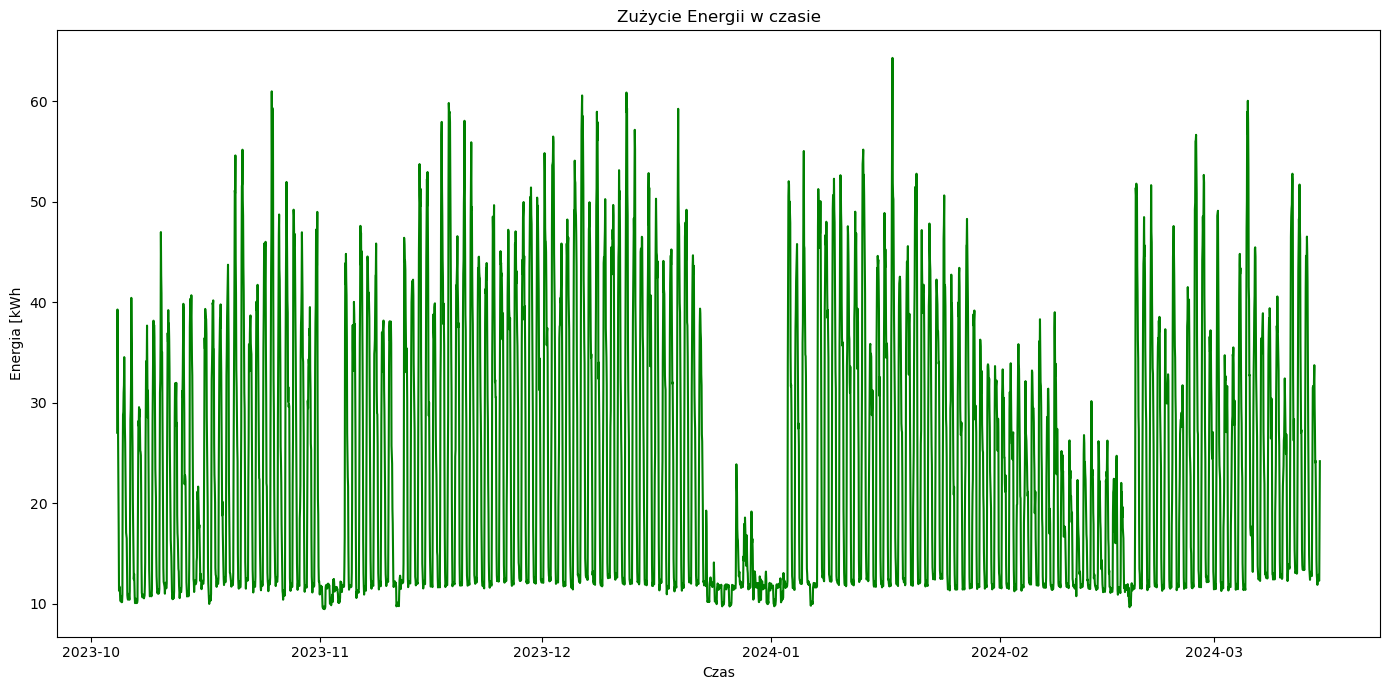

In [37]:

plt.figure(figsize=(14, 7))
plt.plot(Data1['Data pomiaru (Obiektu Warszawa)'], Data1['Total_Energy_kWh'], color='green')
plt.title('Zużycie Energii w czasie')
plt.xlabel('Czas')
plt.ylabel('Energia [kWh')
plt.tight_layout()
plt.show()

### Time series energy comsuption trend separated


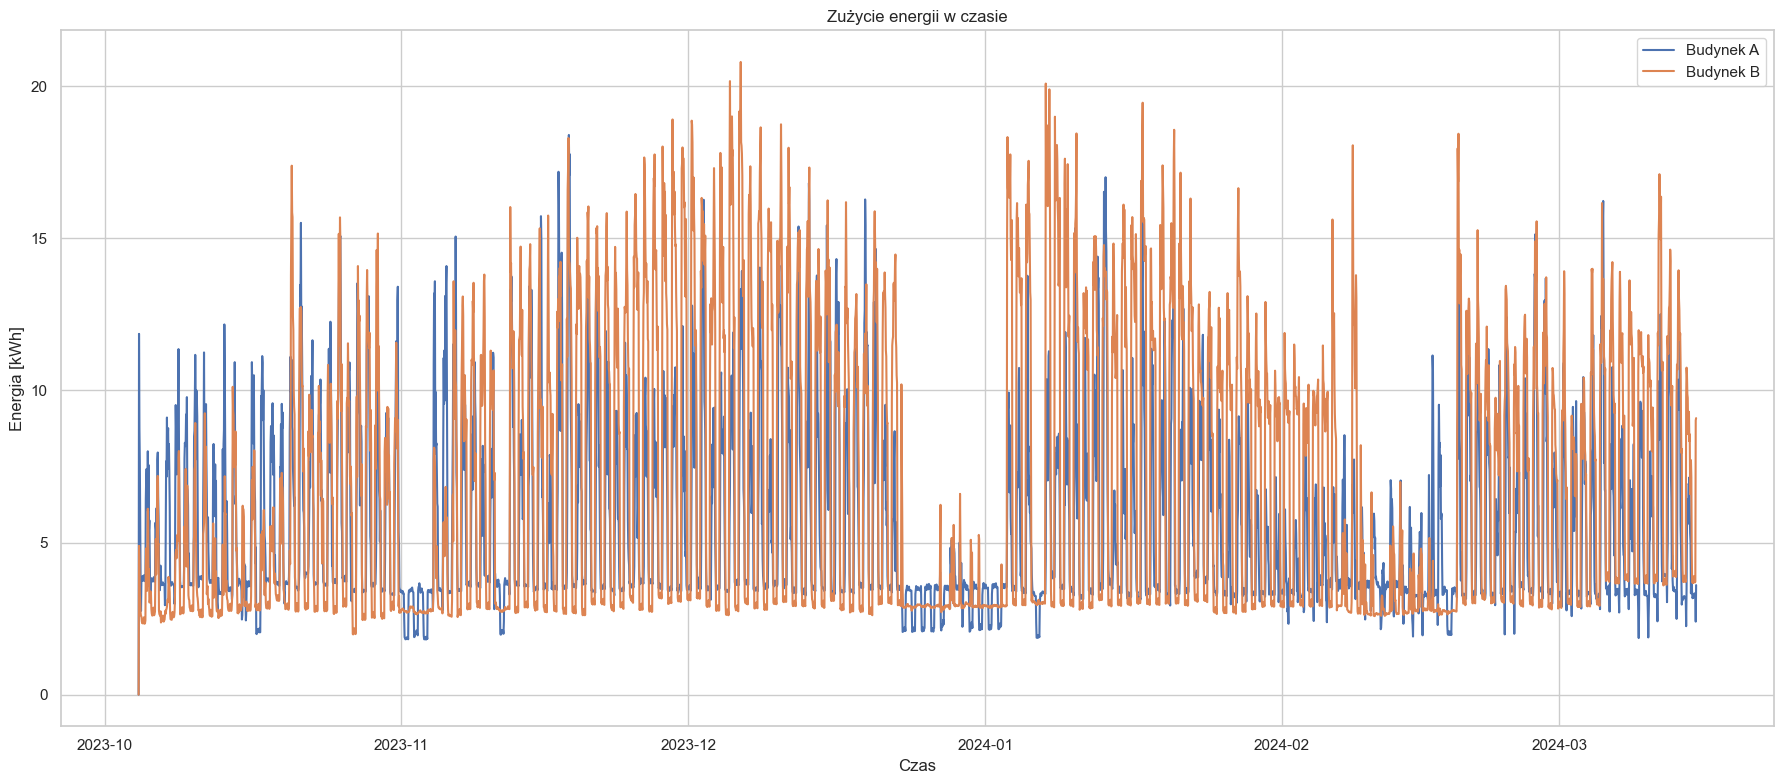

In [39]:
datetime_col = 'Data pomiaru (Obiektu Warszawa)'  
Data1[datetime_col] = pd.to_datetime(Data1[datetime_col])
Data2_final[datetime_col] = pd.to_datetime(Data2_final[datetime_col])

sns.set(style="whitegrid")


plt.figure(figsize=(18, 8))
plt.plot(Data2_final[datetime_col], Data2_final.iloc[:, 1], label='Budynek A')
plt.plot(Data2_final[datetime_col], Data2_final.iloc[:, 2], label='Budynek B')
if 'Główny budynek-łącznik' in Data2_final.columns:
    plt.plot(Data2_final[datetime_col], Data2_final['Główny budynek-łącznik'], label='Główny budynek-łącznik')

plt.title('Zużycie energii w czasie')
plt.xlabel('Czas')
plt.ylabel('Energia [kWh]')
plt.legend()
plt.tight_layout()
plt.show()



In [40]:
print(Data1.columns.tolist())

['Data pomiaru (Obiektu Warszawa)', 'Total_Energy_kWh', 'Temperature_C']


### Temperature trend over time time 

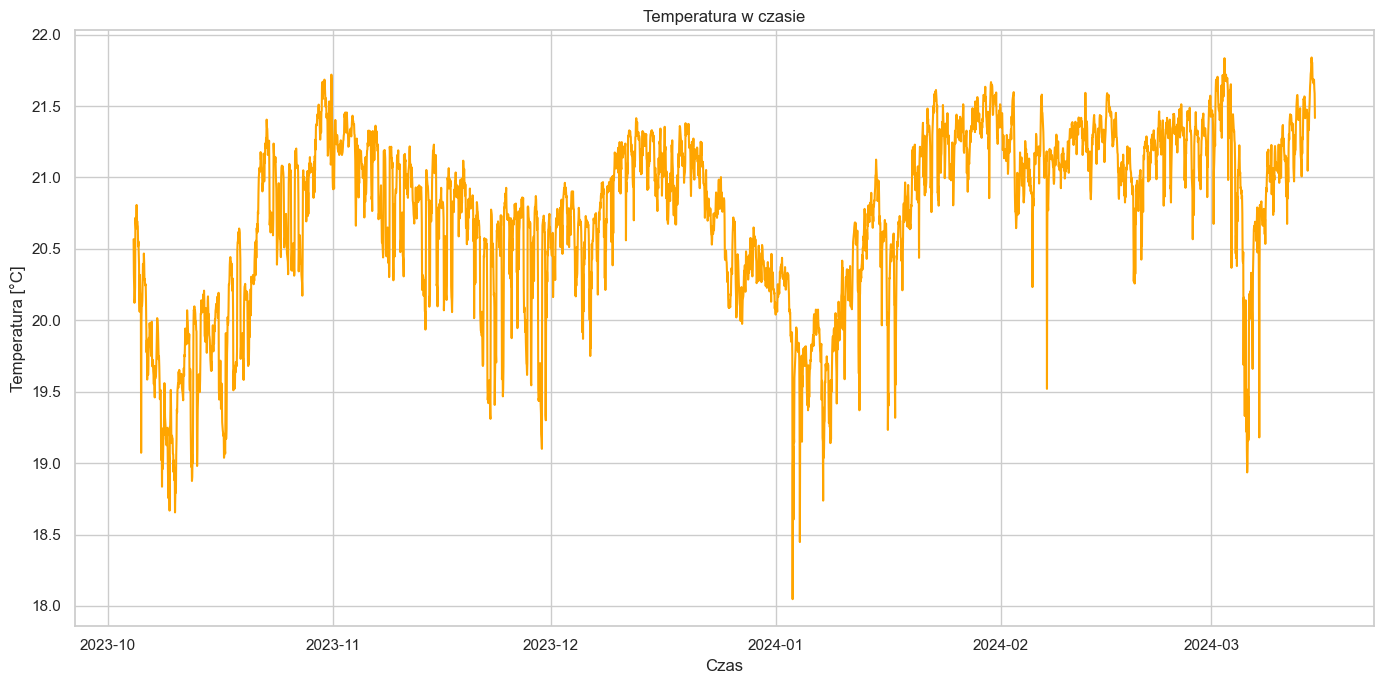

In [42]:
if 'Temperature_C' in Data1.columns:
    plt.figure(figsize=(14, 7))
    plt.plot(Data1[datetime_col], Data1['Temperature_C'], color='orange')
plt.title('Temperatura w czasie')
plt.xlabel('Czas')
plt.ylabel('Temperatura [°C]')
plt.tight_layout()
plt.show()

### Correlation matrix Energy&Temp


In [44]:
print("\nCorrelation matrix (Energy + Temperature):")
corr = Data1.corr(numeric_only=True)
print(corr)


Correlation matrix (Energy + Temperature):
                  Total_Energy_kWh  Temperature_C
Total_Energy_kWh          1.000000      -0.188033
Temperature_C            -0.188033       1.000000


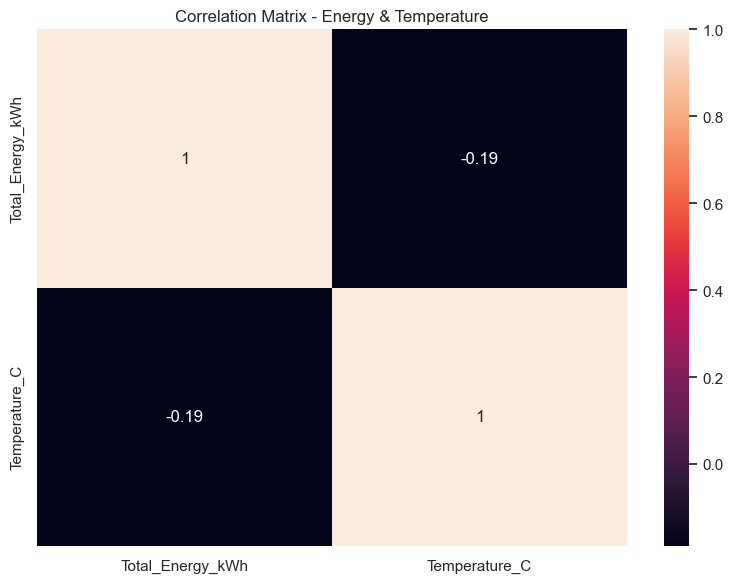

In [45]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True)
plt.title('Correlation Matrix - Energy & Temperature')
plt.tight_layout()
plt.show()

### Time series (only for visual)

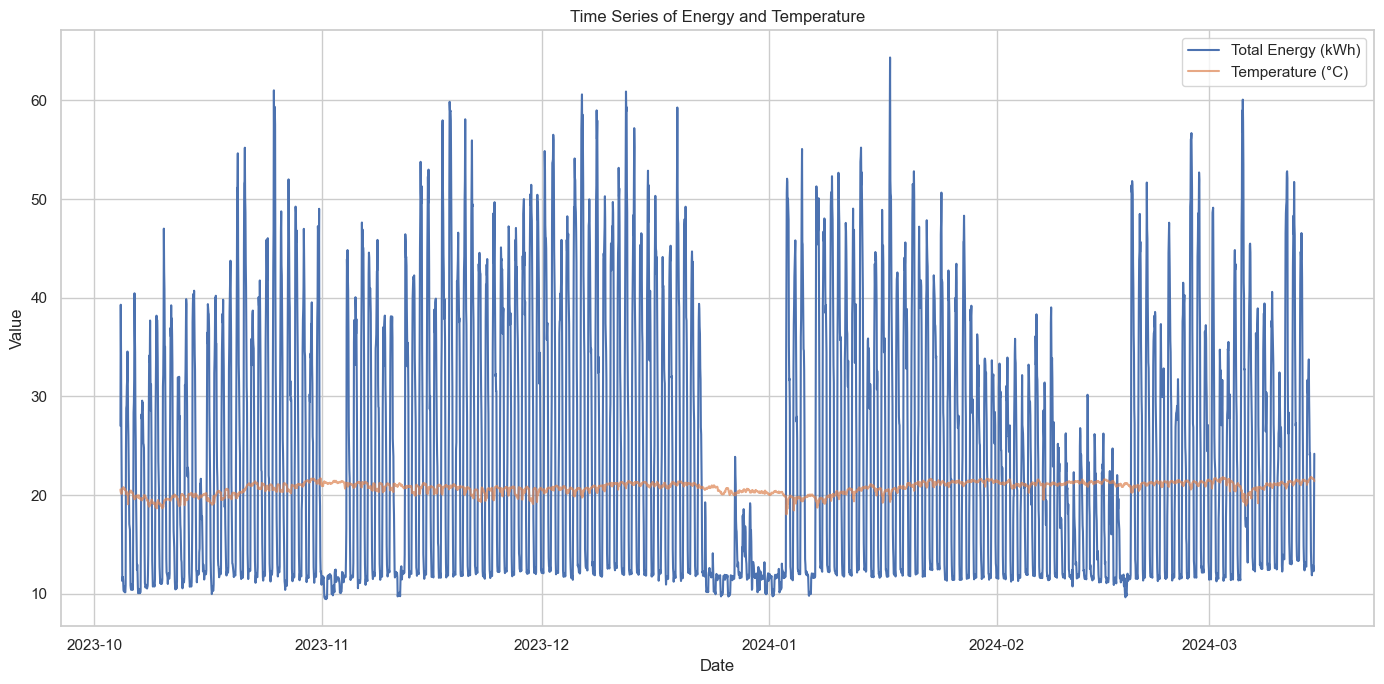

In [47]:
plt.figure(figsize=(14, 7))
plt.plot(Data1['Data pomiaru (Obiektu Warszawa)'], 
         Data1.iloc[:, 1], label='Total Energy (kWh)')
plt.plot(Data1['Data pomiaru (Obiektu Warszawa)'], 
         Data1.iloc[:, 2], label='Temperature (°C)', alpha=0.7)
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time Series of Energy and Temperature')
plt.legend()
plt.tight_layout()
plt.show()

### Pairplot

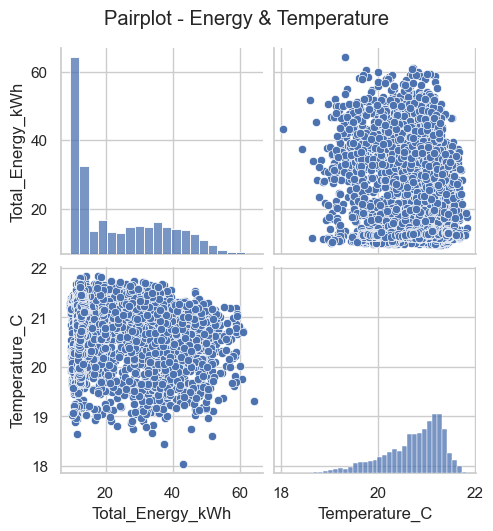

In [49]:
sns.pairplot(Data1.select_dtypes(include='number'))
plt.suptitle('Pairplot - Energy & Temperature', y=1.05)
plt.show()

### Corellation matrix seperate parts of buildings

In [51]:
print("\nCorrelation matrix (EnergyA + EnergyB +Łącznik):")
corr2 = Data2_final.corr(numeric_only=True)
print(corr2)


Correlation matrix (EnergyA + EnergyB +Łącznik):
                        BudynekA_Energy_kWh  BudynekB_Energy_KWh  \
BudynekA_Energy_kWh                1.000000             0.702788   
BudynekB_Energy_KWh                0.702788             1.000000   
Główny budynek-Łącznik             0.858852             0.778198   

                        Główny budynek-Łącznik  
BudynekA_Energy_kWh                   0.858852  
BudynekB_Energy_KWh                   0.778198  
Główny budynek-Łącznik                1.000000  


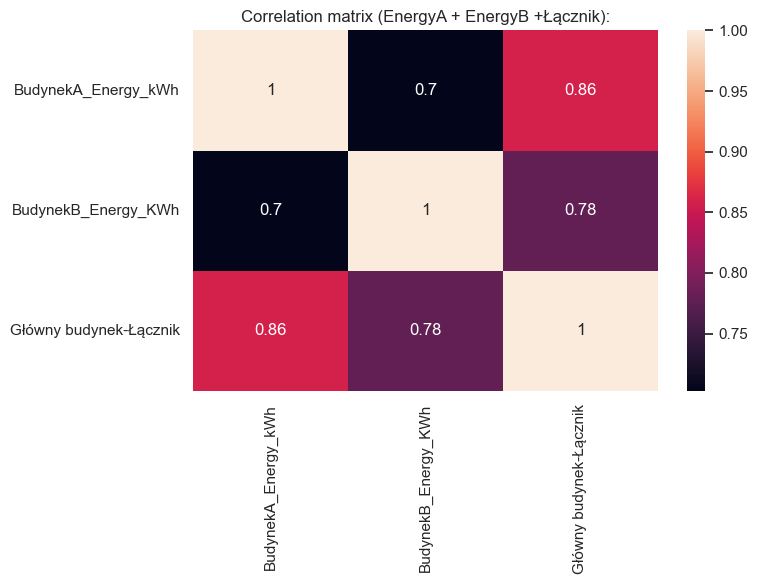

In [52]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr2, annot=True)
plt.title('Correlation matrix (EnergyA + EnergyB +Łącznik):')
plt.tight_layout()
plt.show()

### Scatterplot Temperature vs Energy consumption

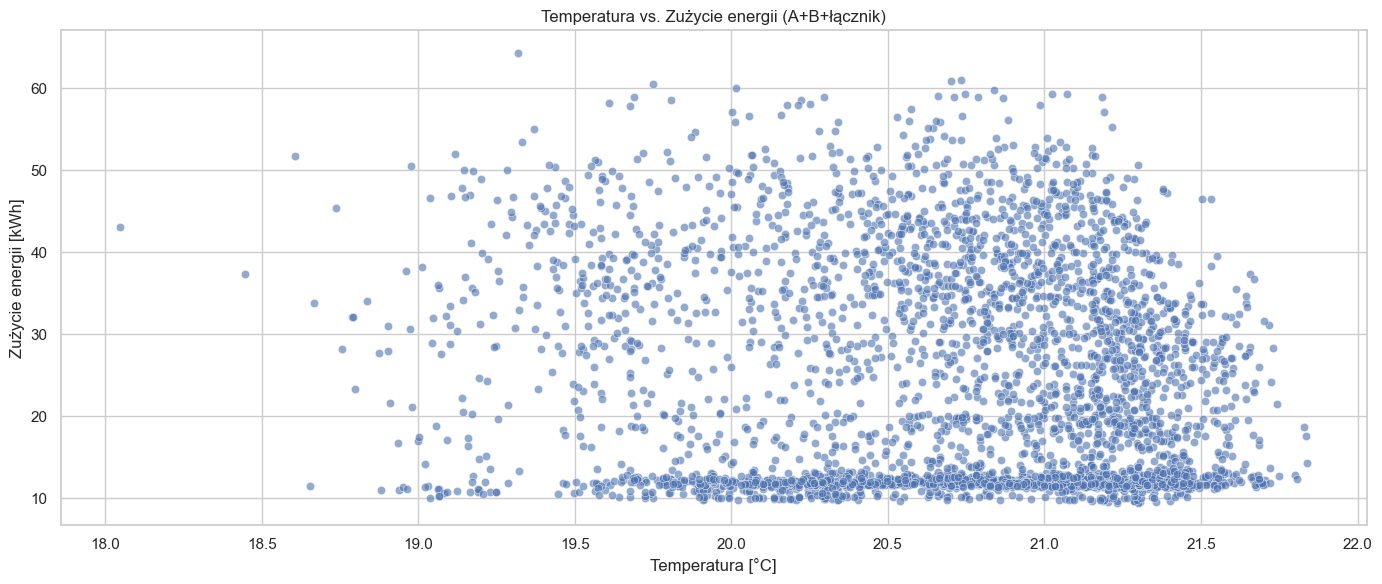

In [54]:
plt.figure(figsize=(14, 6))
sns.scatterplot(data=Data1, x=Data1["Temperature_C"], y=Data1["Total_Energy_kWh"], alpha=0.6)
plt.title('Temperatura vs. Zużycie energii (A+B+łącznik)')
plt.xlabel('Temperatura [°C]')
plt.ylabel('Zużycie energii [kWh]')
plt.grid(True)
plt.tight_layout()
plt.show()

### Scatter plot by season

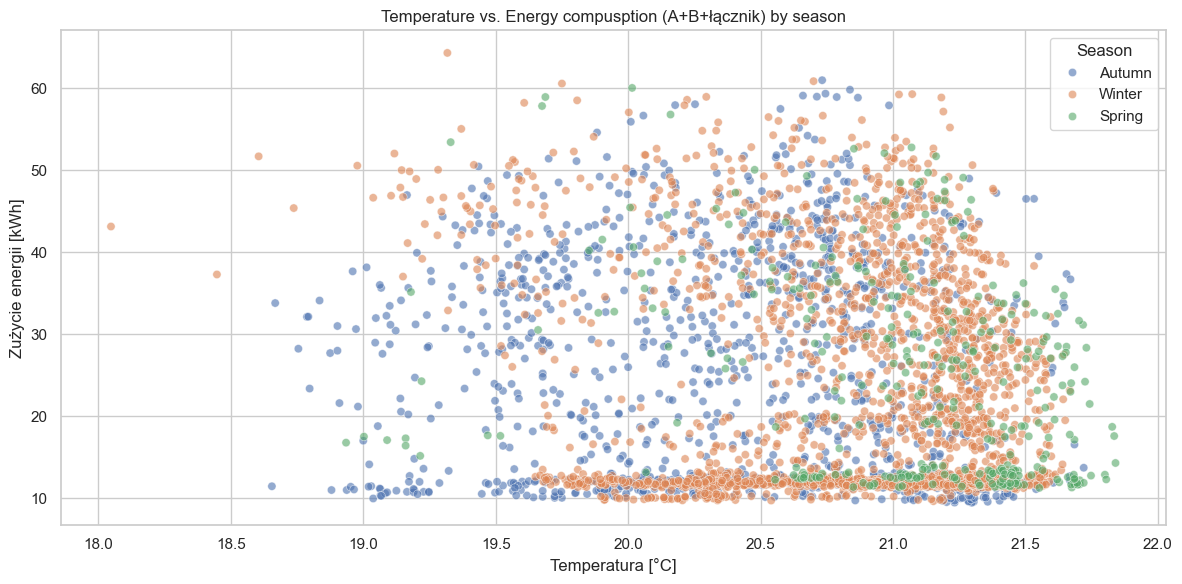

In [56]:
def assign_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

Data1['Season'] = Data1["Data pomiaru (Obiektu Warszawa)"].dt.month.apply(assign_season)


plt.figure(figsize=(12, 6))
sns.scatterplot(data=Data1,x=Data1["Temperature_C"], y=Data1["Total_Energy_kWh"], hue='Season', alpha=0.6)
plt.title('Temperature vs. Energy compusption (A+B+łącznik) by season')
plt.xlabel('Temperatura [°C]')
plt.ylabel('Zużycie energii [kWh]')
plt.legend(title='Season')
plt.grid(True)
plt.tight_layout()
plt.show()

### Distribution of each parameter


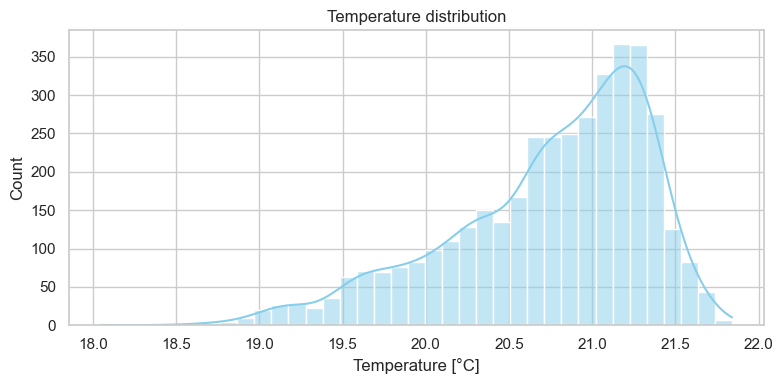

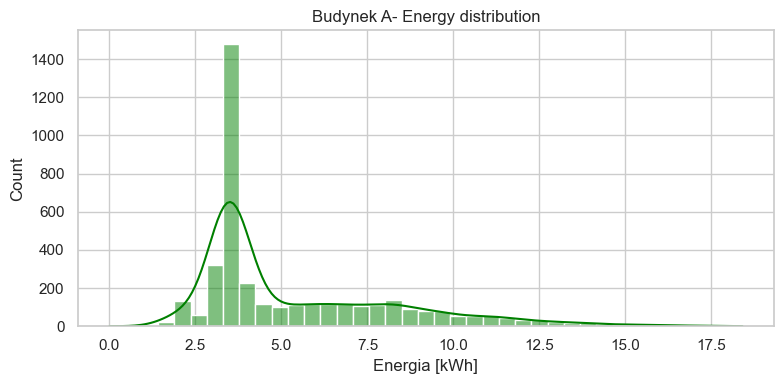

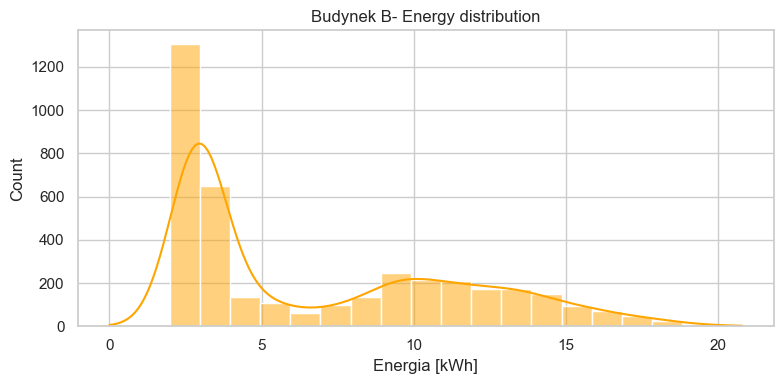

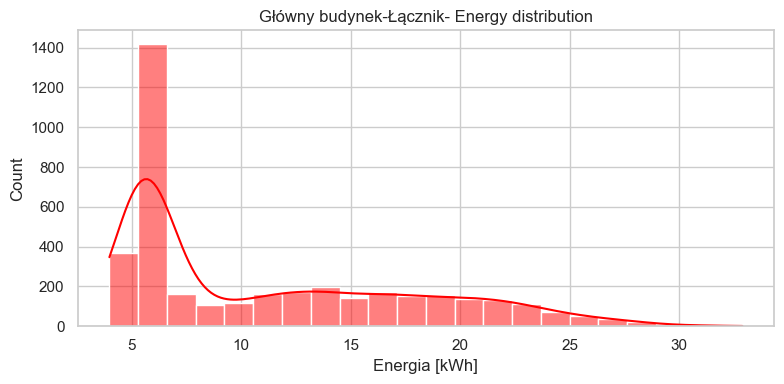

In [58]:
sns.set(style="whitegrid")

plt.figure(figsize=(8, 4))
sns.histplot(Data1["Temperature_C"].dropna(), kde=True, color='skyblue')
plt.title('Temperature distribution')
plt.xlabel('Temperature [°C]')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 4))
sns.histplot(Data2_final["BudynekA_Energy_kWh"].dropna(), kde=True, color='green')
plt.title('Budynek A- Energy distribution')
plt.xlabel('Energia [kWh]')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 4))
sns.histplot(Data2_final["BudynekB_Energy_KWh"].dropna(), kde=True, color='orange')
plt.title('Budynek B- Energy distribution')
plt.xlabel('Energia [kWh]')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 4))
sns.histplot(Data2_final["Główny budynek-Łącznik"].dropna(), kde=True, color='red')
plt.title('Główny budynek-Łącznik- Energy distribution')
plt.xlabel('Energia [kWh]')
plt.tight_layout()
plt.show()

### HCA 

In [60]:
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.cluster.hierarchy import fcluster

In [61]:
Data1

Data pomiaru (Obiektu Warszawa)  Total_Energy_kWh  Temperature_C  Season
0                2023-10-04 13:00:00            27.026      20.567500  Autumn
1                2023-10-04 14:00:00            39.290      20.325000  Autumn
2                2023-10-04 15:00:00            34.120      20.225000  Autumn
3                2023-10-04 16:00:00            26.440      20.122500  Autumn
4                2023-10-04 17:00:00            22.050      20.155000  Autumn
...                              ...               ...            ...     ...
3903             2024-03-15 03:00:00            12.880      21.682500  Spring
3904             2024-03-15 04:00:00            12.360      21.685000  Spring
3905             2024-03-15 05:00:00            12.290      21.620000  Spring
3906             2024-03-15 06:00:00            17.420      21.587500  Spring
3907             2024-03-15 07:00:00            24.190      21.416667  Spring

[3908 rows x 4 columns]

In [62]:
df_clean = Data1.dropna(subset=["Total_Energy_kWh", "Temperature_C"])

In [63]:
#Standarising values
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_clean[["Total_Energy_kWh", "Temperature_C"]])

In [64]:
linked = linkage(data_scaled, method='ward')

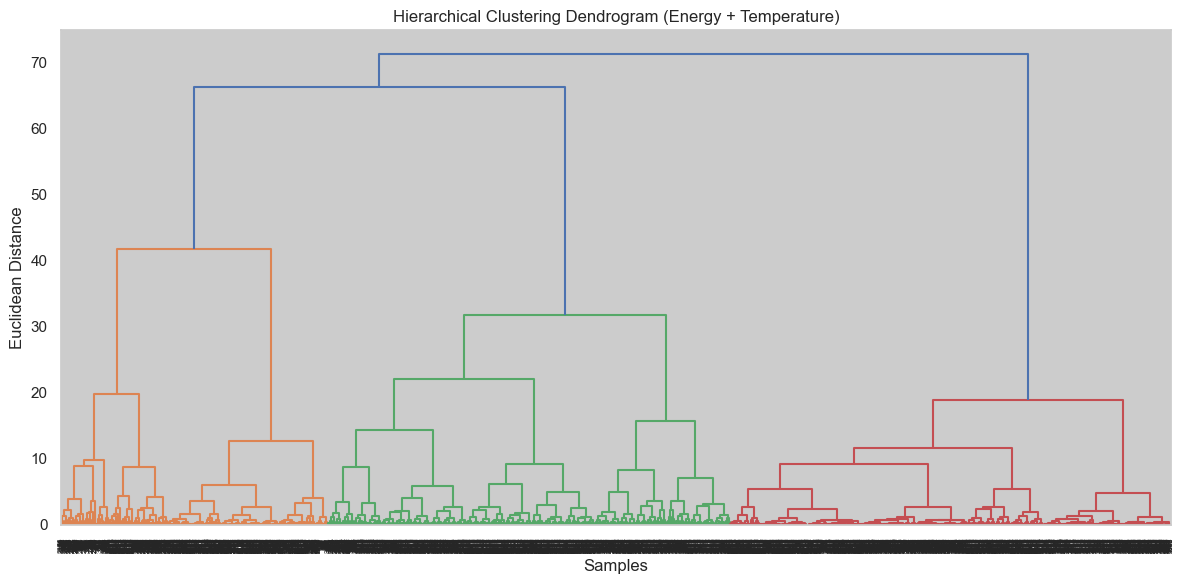

In [65]:
plt.figure(figsize=(12, 6))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=False)
plt.title("Hierarchical Clustering Dendrogram (Energy + Temperature)")
plt.xlabel("Samples")
plt.ylabel("Euclidean Distance")
plt.tight_layout()
plt.show()

In [66]:
num_clusters = 3  # based on dendrogram(the biggest difference on the vertical line is between 40-70, so if we are cutting on 40,we have 3 clusters.

df_clean['Cluster_HCA'] = fcluster(linked, num_clusters, criterion='maxclust')

# Preview
print(df_clean[['Total_Energy_kWh', 'Temperature_C', 'Cluster_HCA']].head())

   Total_Energy_kWh  Temperature_C  Cluster_HCA
0            27.026        20.5675            2
1            39.290        20.3250            2
2            34.120        20.2250            2
3            26.440        20.1225            2
4            22.050        20.1550            2


In [67]:
#Grouping by clusters
cluster_summary = df_clean.groupby('Cluster_HCA')[['Total_Energy_kWh', 'Temperature_C']].mean()
print(cluster_summary)

             Total_Energy_kWh  Temperature_C
Cluster_HCA                                 
1                   13.413280      21.122036
2                   36.194376      20.875195
3                   21.075532      19.909694


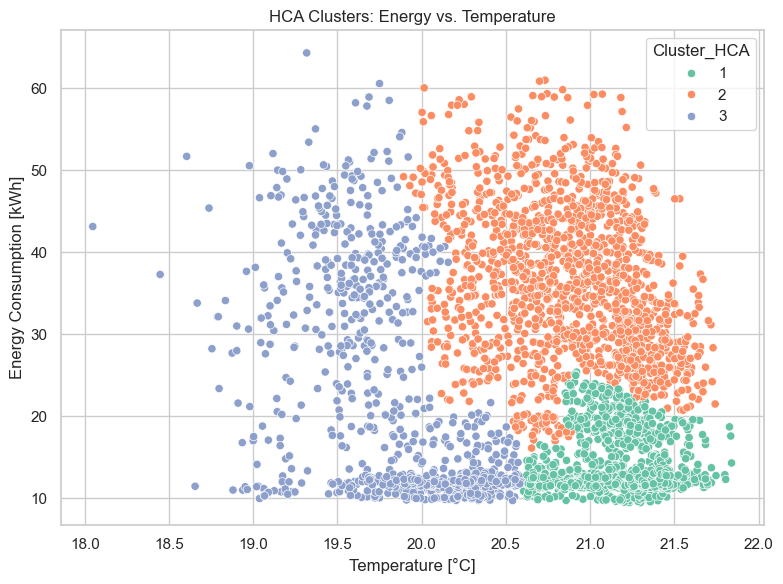

In [68]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df_clean,
    x="Temperature_C",
    y="Total_Energy_kWh",
    hue="Cluster_HCA",
    palette="Set2"
)
plt.title("HCA Clusters: Energy vs. Temperature")
plt.xlabel("Temperature [°C]")
plt.ylabel("Energy Consumption [kWh]")
plt.grid(True)
plt.tight_layout()
plt.show()

In [69]:
df_clean.groupby('Cluster_HCA')[["Total_Energy_kWh", "Temperature_C"]].describe()

Total_Energy_kWh                                                \
                       count       mean        std    min      25%     50%   
Cluster_HCA                                                                  
1                     1552.0  13.413280   3.110019   9.46  11.7200  12.120   
2                     1416.0  36.194376   9.162024  16.13  29.0375  35.520   
3                      940.0  21.075532  12.877746   9.73  11.7600  12.765   

                            Temperature_C                                \
                 75%    max         count       mean       std      min   
Cluster_HCA                                                               
1            13.2050  25.40        1552.0  21.122036  0.255449  20.6050   
2            43.1825  61.01        1416.0  20.875195  0.397738  19.8925   
3            31.4525  64.34         940.0  19.909694  0.443957  18.0475   

                                                   
                   25%      50%      75%      max  
Cluster_HCA                                        
1            20.930000  21.1475  21.3100  21.8400  
2            20.595000  20.8900  21.1950  21.7425  
3            19.609375  19.9325  20.2925  20.6225

<Axes: xlabel='Cluster_HCA', ylabel='Total_Energy_kWh'>

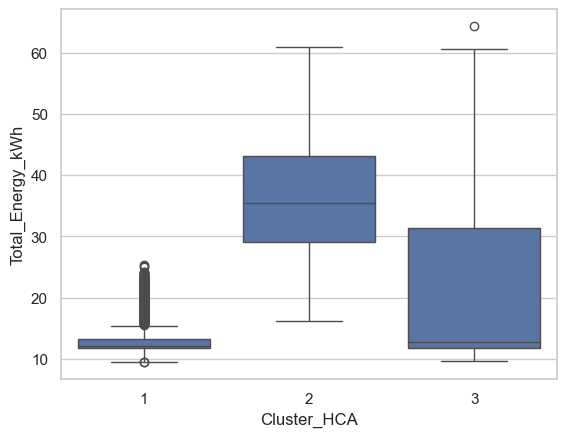

In [70]:

sns.boxplot(x='Cluster_HCA', y='Total_Energy_kWh', data=df_clean)


<Axes: xlabel='Cluster_HCA', ylabel='Temperature_C'>

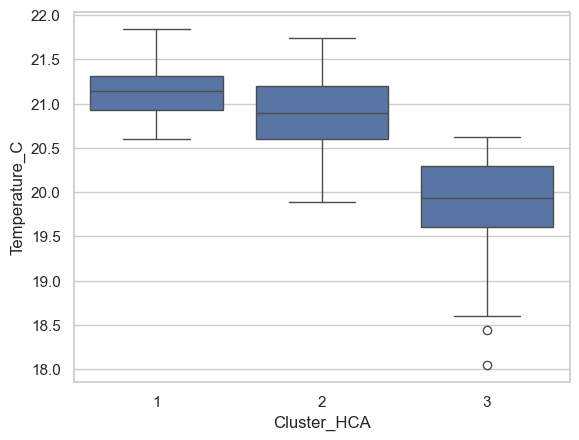

In [71]:
sns.boxplot(x='Cluster_HCA', y='Temperature_C', data=df_clean)

In [72]:
df_clean['Data pomiaru (Obiektu Warszawa)'] = pd.to_datetime(df_clean['Data pomiaru (Obiektu Warszawa)'])
df_clean['day_of_week'] = df_clean['Data pomiaru (Obiektu Warszawa)'].dt.day_name()
df_clean['is_weekend'] = df_clean['Data pomiaru (Obiektu Warszawa)'].dt.weekday >= 5 
df_clean['hour'] = df_clean['Data pomiaru (Obiektu Warszawa)'].dt.hour

### Energy consumption by cluster


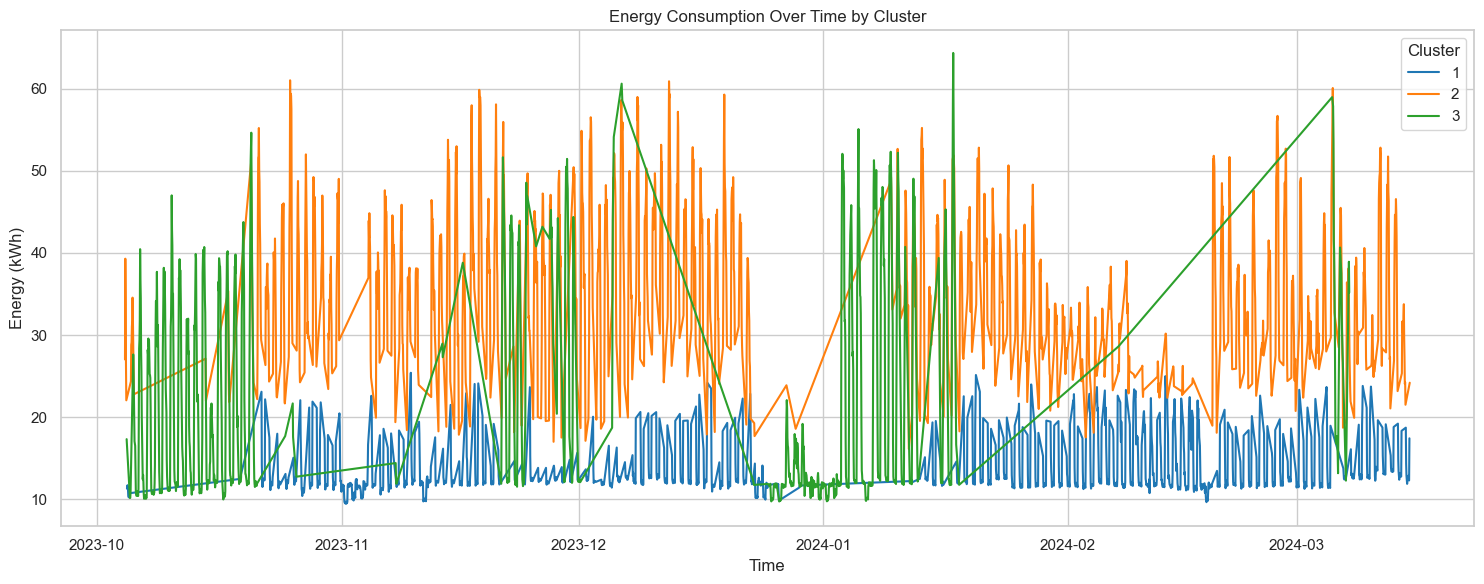

In [74]:
plt.figure(figsize=(15, 6))
sns.lineplot(data=df_clean, x='Data pomiaru (Obiektu Warszawa)', y='Total_Energy_kWh', hue='Cluster_HCA', palette='tab10')
plt.title('Energy Consumption Over Time by Cluster')
plt.xlabel('Time')
plt.ylabel('Energy (kWh)')
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()

### Temperature per cluster over time

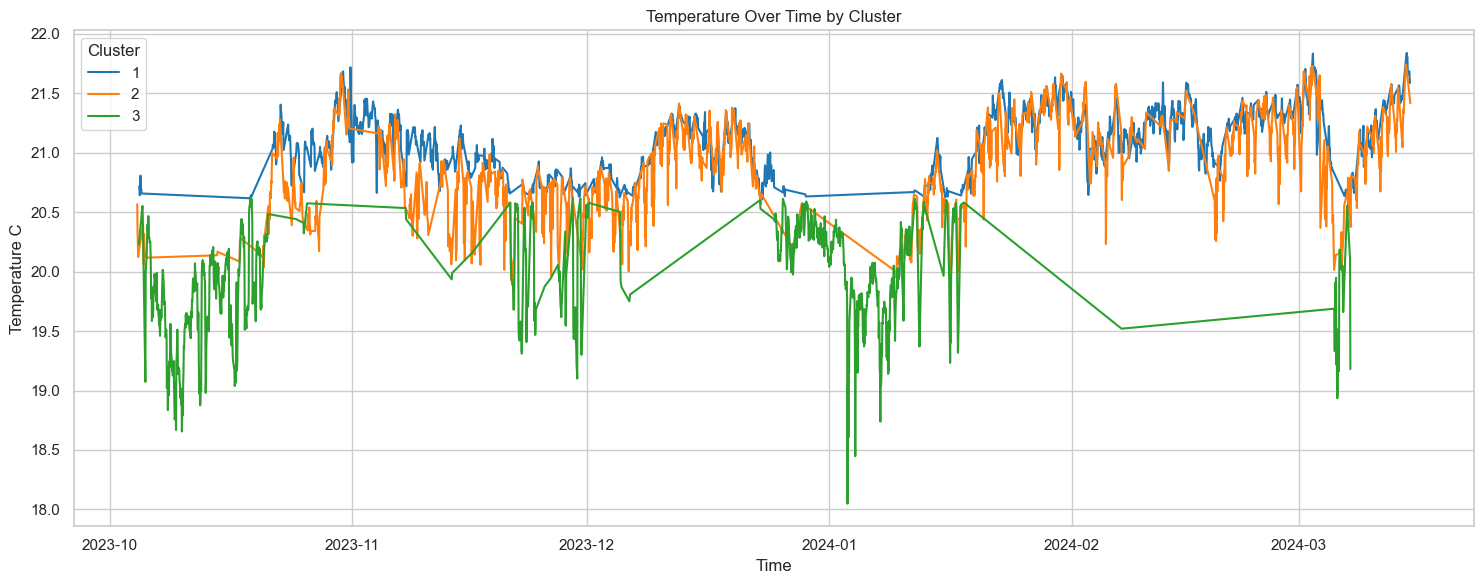

In [76]:
plt.figure(figsize=(15, 6))
sns.lineplot(data=df_clean, x='Data pomiaru (Obiektu Warszawa)', y='Temperature_C', hue='Cluster_HCA', palette='tab10')
plt.title('Temperature Over Time by Cluster')
plt.xlabel('Time')
plt.ylabel('Temperature C')
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()

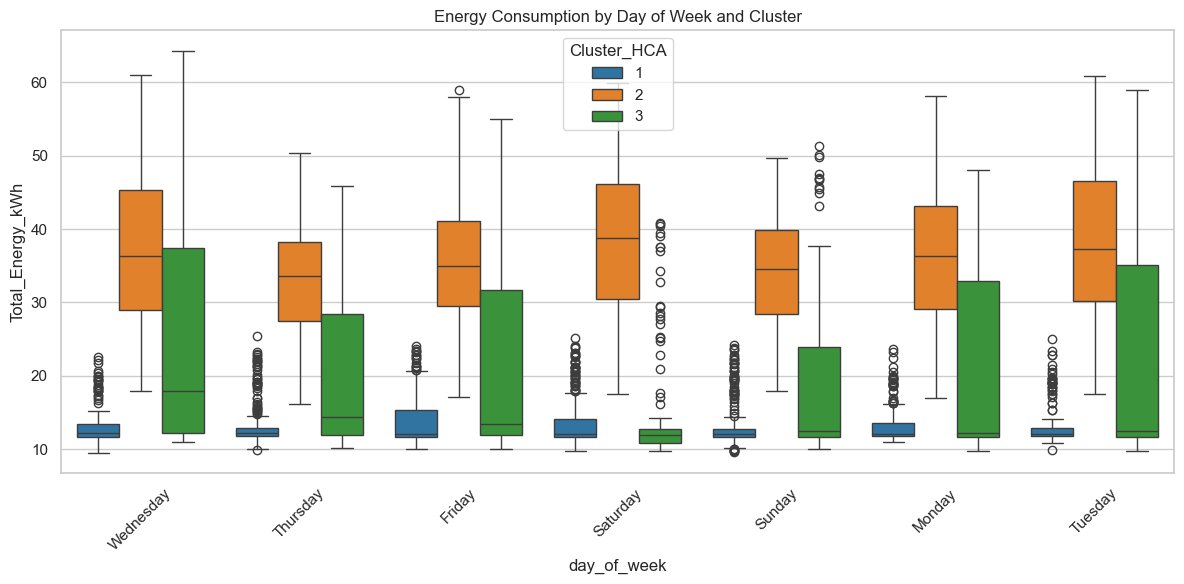

In [77]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_clean, x='day_of_week', y='Total_Energy_kWh', hue='Cluster_HCA', palette='tab10')
plt.title('Energy Consumption by Day of Week and Cluster')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

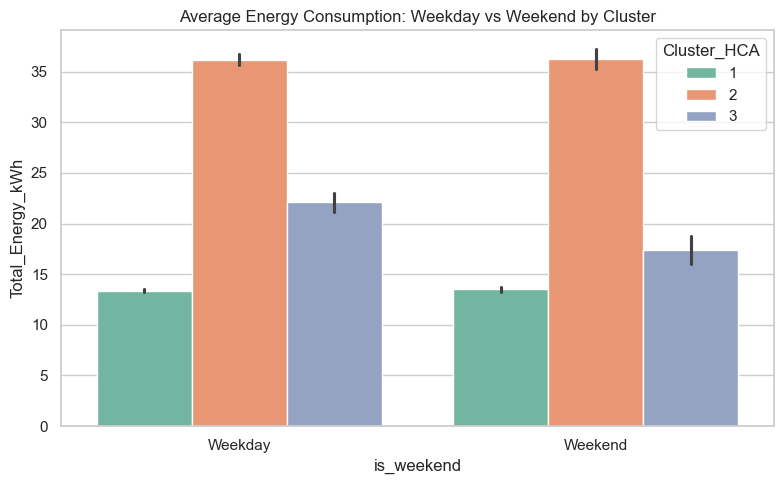

In [78]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df_clean, x='is_weekend', y='Total_Energy_kWh', hue='Cluster_HCA', palette='Set2')
plt.xticks([0, 1], ['Weekday', 'Weekend'])
plt.title('Average Energy Consumption: Weekday vs Weekend by Cluster')
plt.tight_layout()
plt.show()

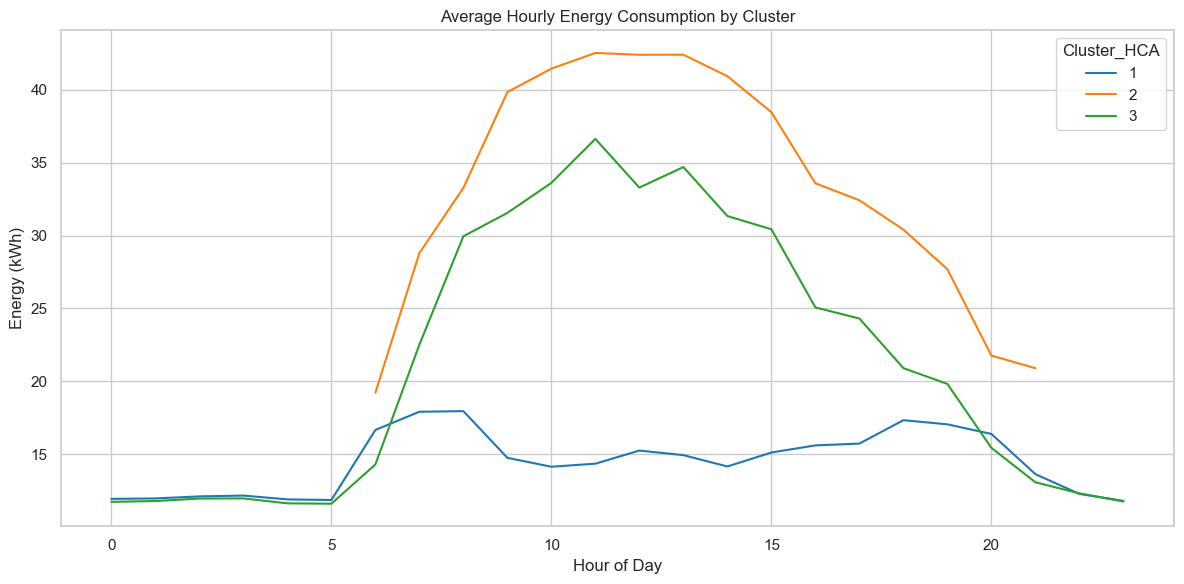

In [79]:
hourly_avg = df_clean.groupby(['hour', 'Cluster_HCA'])['Total_Energy_kWh'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_avg, x='hour', y='Total_Energy_kWh', hue='Cluster_HCA', palette='tab10')
plt.title('Average Hourly Energy Consumption by Cluster')
plt.xlabel('Hour of Day')
plt.ylabel('Energy (kWh)')
plt.grid(True)
plt.tight_layout()
plt.show()

### what data is in each cluster

In [81]:
for cluster_num in sorted(df_clean['Cluster_HCA'].unique()):
    cluster_df = df_clean[df_clean['Cluster_HCA'] == cluster_num]
    cluster_df.to_excel(f'cluster_{cluster_num}.xlsx', index=False)

In [82]:
cluster1=pd.read_excel("cluster_1.xlsx")
cluster2=pd.read_excel("cluster_2.xlsx")
cluster3=pd.read_excel("cluster_3.xlsx")

In [83]:
cluster1

Data pomiaru (Obiektu Warszawa)  Total_Energy_kWh  Temperature_C  Season  \
0                2023-10-04 19:00:00             11.30        20.7175  Autumn   
1                2023-10-04 20:00:00             11.67        20.6800  Autumn   
2                2023-10-04 21:00:00             11.71        20.6425  Autumn   
3                2023-10-04 22:00:00             11.28        20.6950  Autumn   
4                2023-10-04 23:00:00             10.38        20.8075  Autumn   
...                              ...               ...            ...     ...   
1547             2024-03-15 02:00:00             12.59        21.6600  Spring   
1548             2024-03-15 03:00:00             12.88        21.6825  Spring   
1549             2024-03-15 04:00:00             12.36        21.6850  Spring   
1550             2024-03-15 05:00:00             12.29        21.6200  Spring   
1551             2024-03-15 06:00:00             17.42        21.5875  Spring   

      Cluster_HCA day_of_week  is_weekend  hour  
0               1   Wednesday       False    19  
1               1   Wednesday       False    20  
2               1   Wednesday       False    21  
3               1   Wednesday       False    22  
4               1   Wednesday       False    23  
...           ...         ...         ...   ...  
1547            1      Friday       False     2  
1548            1      Friday       False     3  
1549            1      Friday       False     4  
1550            1      Friday       False     5  
1551            1      Friday       False     6  

[1552 rows x 8 columns]

In [84]:
cluster2

Data pomiaru (Obiektu Warszawa)  Total_Energy_kWh  Temperature_C  Season  \
0                2023-10-04 13:00:00            27.026      20.567500  Autumn   
1                2023-10-04 14:00:00            39.290      20.325000  Autumn   
2                2023-10-04 15:00:00            34.120      20.225000  Autumn   
3                2023-10-04 16:00:00            26.440      20.122500  Autumn   
4                2023-10-04 17:00:00            22.050      20.155000  Autumn   
...                              ...               ...            ...     ...   
1411             2024-03-14 15:00:00            27.340      21.640000  Spring   
1412             2024-03-14 16:00:00            24.050      21.672500  Spring   
1413             2024-03-14 17:00:00            24.230      21.725000  Spring   
1414             2024-03-14 18:00:00            21.510      21.742500  Spring   
1415             2024-03-15 07:00:00            24.190      21.416667  Spring   

      Cluster_HCA day_of_week  is_weekend  hour  
0               2   Wednesday       False    13  
1               2   Wednesday       False    14  
2               2   Wednesday       False    15  
3               2   Wednesday       False    16  
4               2   Wednesday       False    17  
...           ...         ...         ...   ...  
1411            2    Thursday       False    15  
1412            2    Thursday       False    16  
1413            2    Thursday       False    17  
1414            2    Thursday       False    18  
1415            2      Friday       False     7  

[1416 rows x 8 columns]

In [85]:
cluster3

Data pomiaru (Obiektu Warszawa)  Total_Energy_kWh  Temperature_C  Season  \
0               2023-10-04 18:00:00             17.32        20.2300  Autumn   
1               2023-10-05 04:00:00             10.15        20.5175  Autumn   
2               2023-10-05 05:00:00             10.17        20.5525  Autumn   
3               2023-10-05 06:00:00             10.92        20.4575  Autumn   
4               2023-10-05 14:00:00             27.63        19.0725  Autumn   
..                              ...               ...            ...     ...   
935             2024-03-06 16:00:00             32.63        19.8875  Spring   
936             2024-03-06 17:00:00             30.54        19.6600  Spring   
937             2024-03-07 05:00:00             12.27        20.5550  Spring   
938             2024-03-07 14:00:00             38.92        20.1100  Spring   
939             2024-03-07 15:00:00             35.17        19.1800  Spring   

     Cluster_HCA day_of_week  is_weekend  hour  
0              3   Wednesday       False    18  
1              3    Thursday       False     4  
2              3    Thursday       False     5  
3              3    Thursday       False     6  
4              3    Thursday       False    14  
..           ...         ...         ...   ...  
935            3   Wednesday       False    16  
936            3   Wednesday       False    17  
937            3    Thursday       False     5  
938            3    Thursday       False    14  
939            3    Thursday       False    15  

[940 rows x 8 columns]

### K means


In [87]:
from sklearn.cluster import KMeans

In [88]:
data_scaled

array([[ 0.26627798, -0.28877182],
       [ 1.19524357, -0.69240974],
       [ 0.80362973, -0.85885837],
       ...,
       [-0.84993509,  1.46309995],
       [-0.46135115,  1.40900415],
       [ 0.05145847,  1.12465442]])

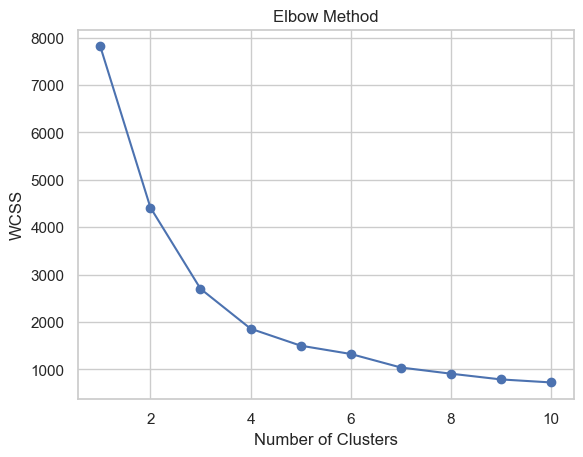

In [89]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS") #Within-Cluster Sum of Squares
plt.grid(True)
plt.show()

In [90]:
k = 3 #3 or 4,lets try 3 
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(data_scaled)
DataKm=Data1
DataKm['Cluster'] = clusters


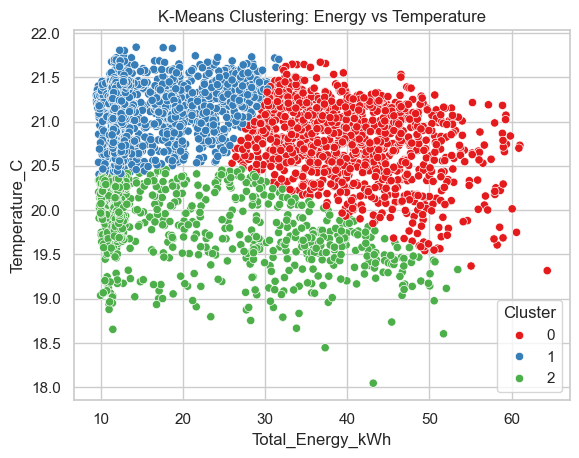

In [91]:
sns.scatterplot(data=DataKm, x="Total_Energy_kWh", y="Temperature_C", hue="Cluster", palette="Set1")
plt.title("K-Means Clustering: Energy vs Temperature")
plt.show()

In [92]:
DataKm

Data pomiaru (Obiektu Warszawa)  Total_Energy_kWh  Temperature_C  Season  \
0                2023-10-04 13:00:00            27.026      20.567500  Autumn   
1                2023-10-04 14:00:00            39.290      20.325000  Autumn   
2                2023-10-04 15:00:00            34.120      20.225000  Autumn   
3                2023-10-04 16:00:00            26.440      20.122500  Autumn   
4                2023-10-04 17:00:00            22.050      20.155000  Autumn   
...                              ...               ...            ...     ...   
3903             2024-03-15 03:00:00            12.880      21.682500  Spring   
3904             2024-03-15 04:00:00            12.360      21.685000  Spring   
3905             2024-03-15 05:00:00            12.290      21.620000  Spring   
3906             2024-03-15 06:00:00            17.420      21.587500  Spring   
3907             2024-03-15 07:00:00            24.190      21.416667  Spring   

      Cluster  
0           0  
1           0  
2           0  
3           2  
4           2  
...       ...  
3903        1  
3904        1  
3905        1  
3906        1  
3907        1  

[3908 rows x 5 columns]

In [93]:
DataKm['Data pomiaru (Obiektu Warszawa)'] = pd.to_datetime(DataKm['Data pomiaru (Obiektu Warszawa)'])  
Data1.set_index('Data pomiaru (Obiektu Warszawa)', inplace=True)

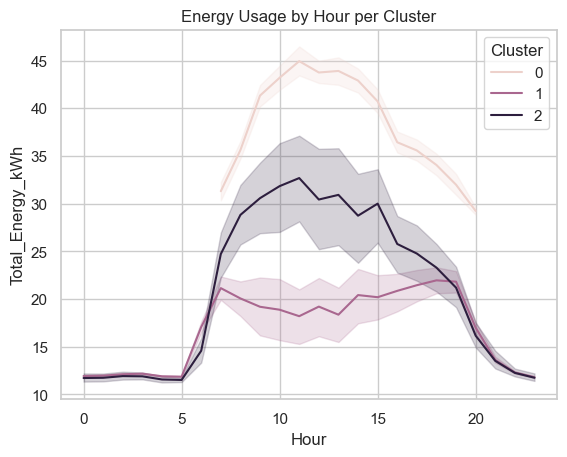

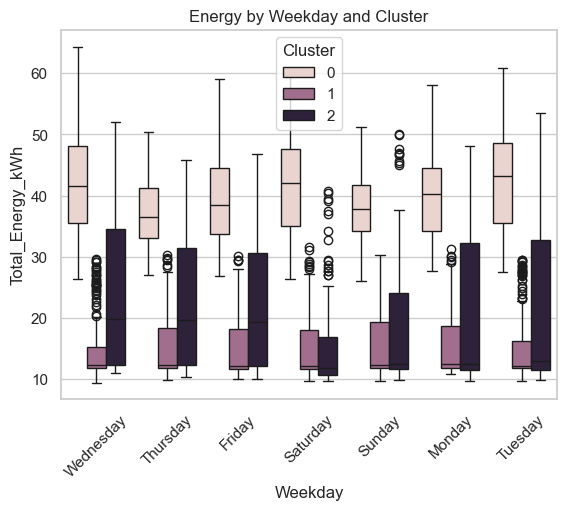

In [94]:
DataKm['Hour'] = DataKm.index.hour
DataKm['Weekday'] = DataKm.index.day_name()

# Plot average energy per cluster by hour
sns.lineplot(data=DataKm, x="Hour", y="Total_Energy_kWh", hue="Cluster")
plt.title("Energy Usage by Hour per Cluster")
plt.show()

# Boxplot by weekday
sns.boxplot(data=DataKm, x="Weekday", y="Total_Energy_kWh", hue="Cluster")
plt.title("Energy by Weekday and Cluster")
plt.xticks(rotation=45)
plt.show()

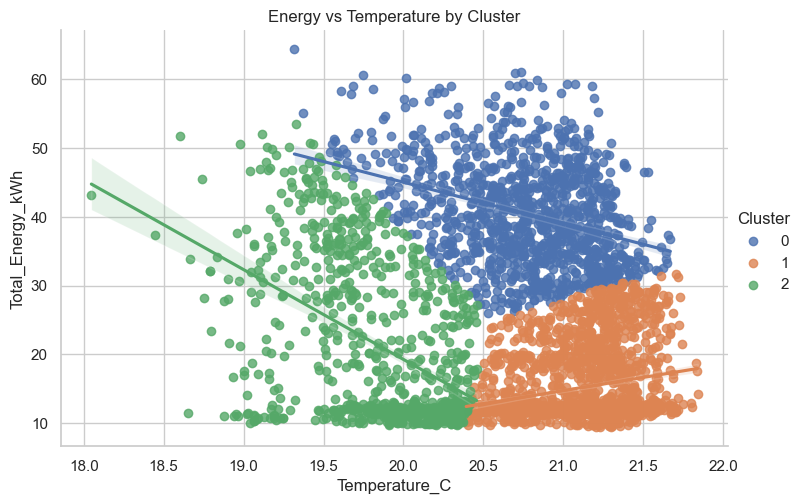

In [95]:
sns.lmplot(data=DataKm, x='Temperature_C', y='Total_Energy_kWh', hue='Cluster', aspect=1.5)
plt.title('Energy vs Temperature by Cluster')
plt.grid(True)
plt.show()

### Second Kmeans, dont know if has sense,ask!!!!!

In [97]:
cluster_summary = DataKm.groupby('Cluster')[['Total_Energy_kWh', 'Temperature_C', 'Hour']].describe()
print(cluster_summary)

        Total_Energy_kWh                                                     \
                   count       mean        std    min    25%    50%     75%   
Cluster                                                                       
0                 1101.0  40.338044   7.471705  25.98  34.48  39.65  45.640   
1                 1987.0  15.106724   5.193998   9.46  11.78  12.31  18.005   
2                  820.0  21.280976  11.586919   9.74  11.79  15.52  30.555   

               Temperature_C             ...                       Hour  \
           max         count       mean  ...       75%      max   count   
Cluster                                  ...                              
0        64.34        1101.0  20.775356  ...  21.08500  21.6700  1101.0   
1        31.67        1987.0  21.091220  ...  21.31625  21.8400  1987.0   
2        53.45         820.0  19.846180  ...  20.20000  20.4575   820.0   

                                                           
              

In [98]:
Data2_final

Data pomiaru (Obiektu Warszawa)  BudynekA_Energy_kWh  \
0                2023-10-04 13:00:00                 0.00   
1                2023-10-04 14:00:00                11.86   
2                2023-10-04 15:00:00                 8.75   
3                2023-10-04 16:00:00                 7.67   
4                2023-10-04 17:00:00                 5.63   
...                              ...                  ...   
3903             2024-03-15 03:00:00                 3.33   
3904             2024-03-15 04:00:00                 3.26   
3905             2024-03-15 05:00:00                 3.23   
3906             2024-03-15 06:00:00                 2.40   
3907             2024-03-15 07:00:00                 3.60   

      BudynekB_Energy_KWh  Główny budynek-Łącznik  
0                    0.00                  27.026  
1                    4.89                  22.540  
2                    4.45                  20.920  
3                    3.30                  15.470  
4                    3.03                  13.390  
...                   ...                     ...  
3903                 3.84                   5.710  
3904                 3.69                   5.410  
3905                 3.71                   5.350  
3906                 9.02                   6.000  
3907                 9.09                  11.500  

[3908 rows x 4 columns]

In [99]:
Data2_final.dropna(inplace=True)

Data2_final.head()

Data pomiaru (Obiektu Warszawa)  BudynekA_Energy_kWh  BudynekB_Energy_KWh  \
0             2023-10-04 13:00:00                 0.00                 0.00   
1             2023-10-04 14:00:00                11.86                 4.89   
2             2023-10-04 15:00:00                 8.75                 4.45   
3             2023-10-04 16:00:00                 7.67                 3.30   
4             2023-10-04 17:00:00                 5.63                 3.03   

   Główny budynek-Łącznik  
0                  27.026  
1                  22.540  
2                  20.920  
3                  15.470  
4                  13.390

In [100]:
scaler2 = StandardScaler()
scaled_parts2= scaler.fit_transform(Data2_final[["BudynekA_Energy_kWh","BudynekB_Energy_KWh","Główny budynek-Łącznik"]])

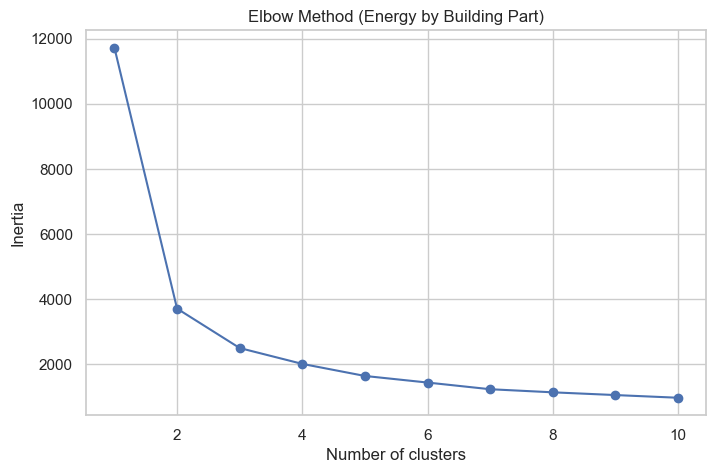

In [101]:
inertia = []
K = range(1, 11)
for i in K:
    km = KMeans(n_clusters=i, random_state=42)
    km.fit(scaled_parts2)
    inertia.append(km.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K, inertia, marker='o')
plt.title('Elbow Method (Energy by Building Part)')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [102]:
#### Choosing k=3

In [103]:
kmeans2 = KMeans(n_clusters=3, random_state=42)
Data2_final['Cluster'] = kmeans.fit_predict(scaled_parts2)

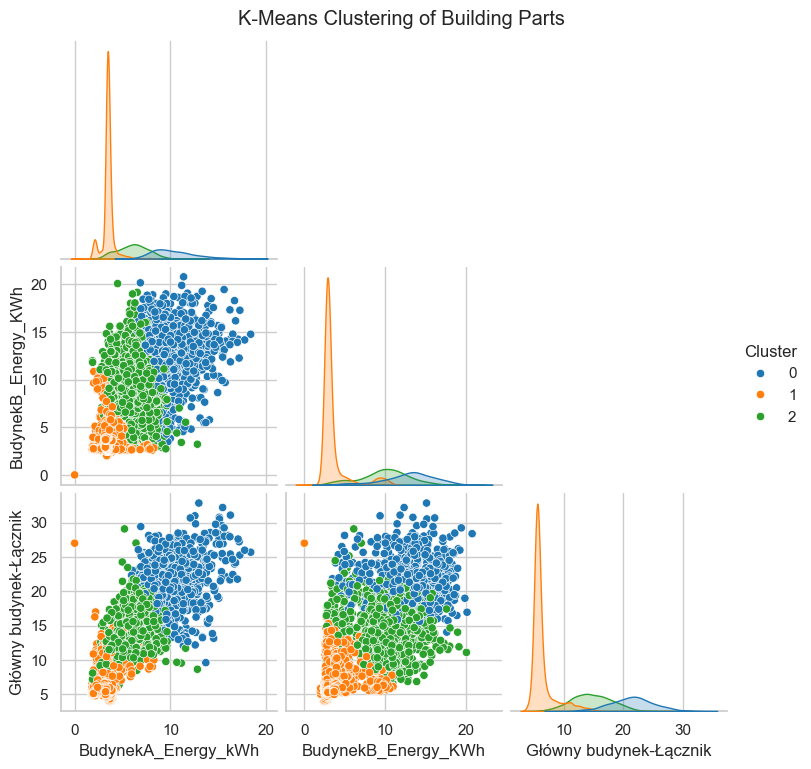

In [104]:
sns.pairplot(Data2_final, hue='Cluster', corner=True, palette='tab10')
plt.suptitle('K-Means Clustering of Building Parts', y=1.02)
plt.show()

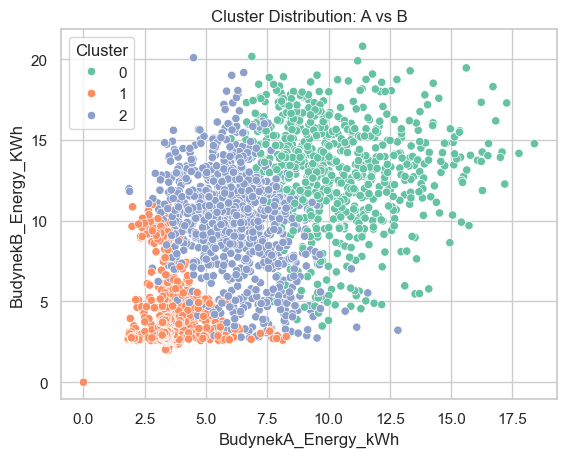

In [105]:
sns.scatterplot(data=Data2_final, x='BudynekA_Energy_kWh', y='BudynekB_Energy_KWh', hue='Cluster', palette='Set2')
plt.title('Cluster Distribution: A vs B')
plt.grid(True)
plt.show()

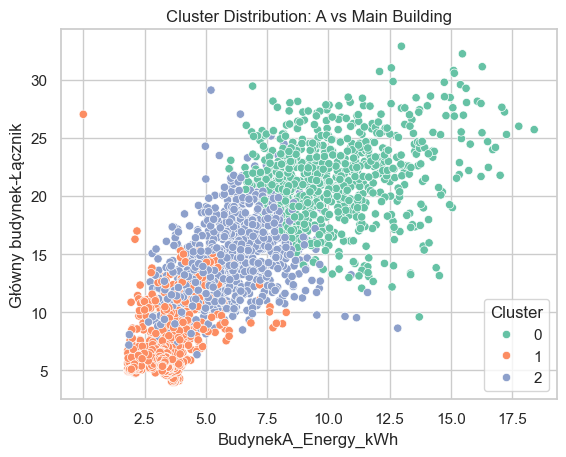

In [106]:
sns.scatterplot(data=Data2_final, x='BudynekA_Energy_kWh', y="Główny budynek-Łącznik", hue='Cluster', palette='Set2')
plt.title('Cluster Distribution: A vs Main Building')
plt.grid(True)
plt.show()

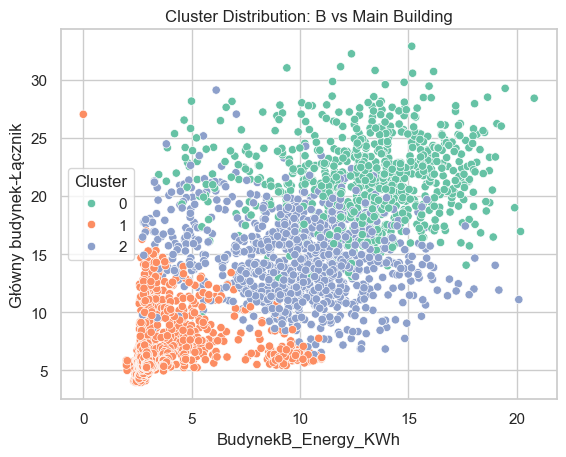

In [107]:
sns.scatterplot(data=Data2_final, x='BudynekB_Energy_KWh', y="Główny budynek-Łącznik", hue='Cluster', palette='Set2')
plt.title('Cluster Distribution: B vs Main Building')
plt.grid(True)
plt.show()

### MLR

In [109]:
import statsmodels.api as sm
Data1

Total_Energy_kWh  Temperature_C  Season  \
Data pomiaru (Obiektu Warszawa)                                            
2023-10-04 13:00:00                        27.026      20.567500  Autumn   
2023-10-04 14:00:00                        39.290      20.325000  Autumn   
2023-10-04 15:00:00                        34.120      20.225000  Autumn   
2023-10-04 16:00:00                        26.440      20.122500  Autumn   
2023-10-04 17:00:00                        22.050      20.155000  Autumn   
...                                           ...            ...     ...   
2024-03-15 03:00:00                        12.880      21.682500  Spring   
2024-03-15 04:00:00                        12.360      21.685000  Spring   
2024-03-15 05:00:00                        12.290      21.620000  Spring   
2024-03-15 06:00:00                        17.420      21.587500  Spring   
2024-03-15 07:00:00                        24.190      21.416667  Spring   

                                 Cluster  Hour    Weekday  
Data pomiaru (Obiektu Warszawa)                            
2023-10-04 13:00:00                    0    13  Wednesday  
2023-10-04 14:00:00                    0    14  Wednesday  
2023-10-04 15:00:00                    0    15  Wednesday  
2023-10-04 16:00:00                    2    16  Wednesday  
2023-10-04 17:00:00                    2    17  Wednesday  
...                                  ...   ...        ...  
2024-03-15 03:00:00                    1     3     Friday  
2024-03-15 04:00:00                    1     4     Friday  
2024-03-15 05:00:00                    1     5     Friday  
2024-03-15 06:00:00                    1     6     Friday  
2024-03-15 07:00:00                    1     7     Friday  

[3908 rows x 6 columns]

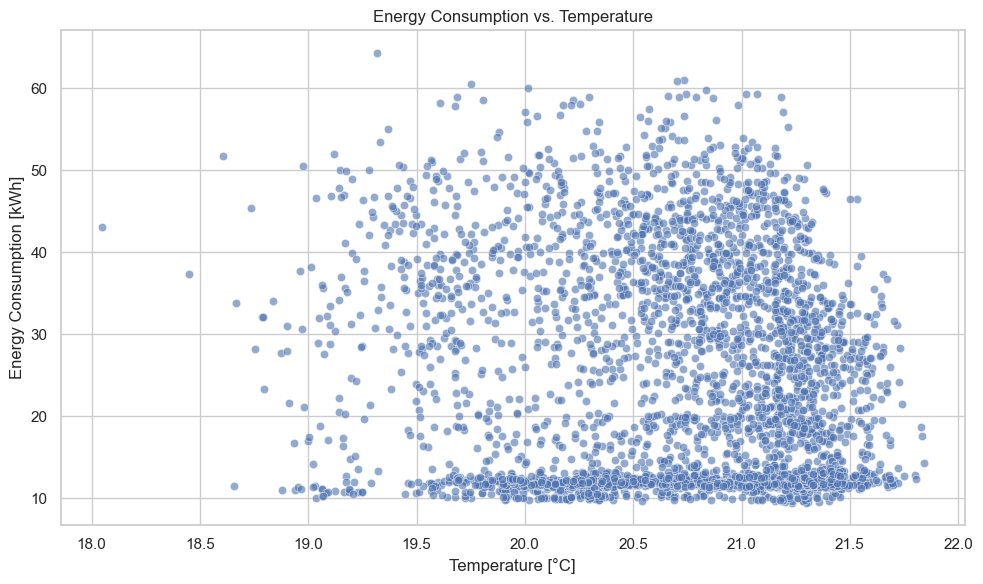

In [110]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=Data1, x='Temperature_C', y='Total_Energy_kWh', alpha=0.6)
plt.title('Energy Consumption vs. Temperature')
plt.xlabel('Temperature [°C]')
plt.ylabel('Energy Consumption [kWh]')
plt.grid(True)
plt.tight_layout()
plt.show()


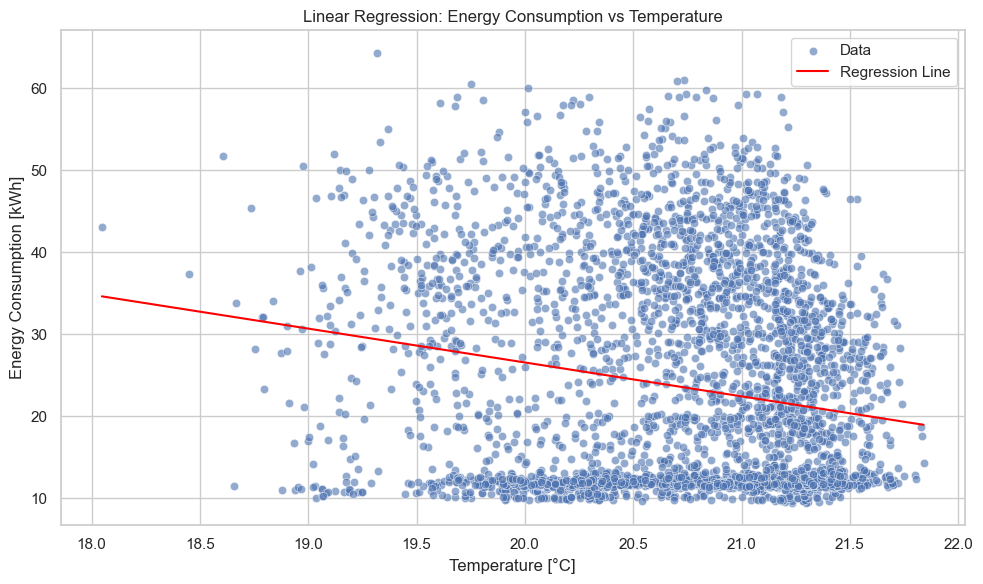

                            OLS Regression Results                            
Dep. Variable:       Total_Energy_kWh   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     143.2
Date:                Sun, 01 Jun 2025   Prob (F-statistic):           1.98e-32
Time:                        21:18:26   Log-Likelihood:                -15559.
No. Observations:                3908   AIC:                         3.112e+04
Df Residuals:                    3906   BIC:                         3.113e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           109.2100      7.165     15.241

In [111]:
df = Data1.dropna()


X = df[['Temperature_C']]
y = df['Total_Energy_kWh']
X_const = sm.add_constant(X)

# Fit model
model = sm.OLS(y, X_const).fit()

df_sorted = df.sort_values(by='Temperature_C')
X_sorted = sm.add_constant(df_sorted[['Temperature_C']])
y_pred = model.predict(X_sorted)

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Temperature_C', y='Total_Energy_kWh', data=df, label='Data', alpha=0.6)
plt.plot(df_sorted['Temperature_C'], y_pred, color='red', label='Regression Line')
plt.title('Linear Regression: Energy Consumption vs Temperature')
plt.xlabel('Temperature [°C]')
plt.ylabel('Energy Consumption [kWh]')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Show model summary
print(model.summary())

In [112]:
import statsmodels.formula.api as smf
df["Hour"] = df["Hour"].astype("category")
df["Weekday"] = df["Weekday"].astype("category")  
model = smf.ols("Total_Energy_kWh ~ Temperature_C + C(Hour) + C(Weekday)", data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       Total_Energy_kWh   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     240.3
Date:                Sun, 01 Jun 2025   Prob (F-statistic):               0.00
Time:                        21:18:26   Log-Likelihood:                -13577.
No. Observations:                3908   AIC:                         2.722e+04
Df Residuals:                    3877   BIC:                         2.741e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

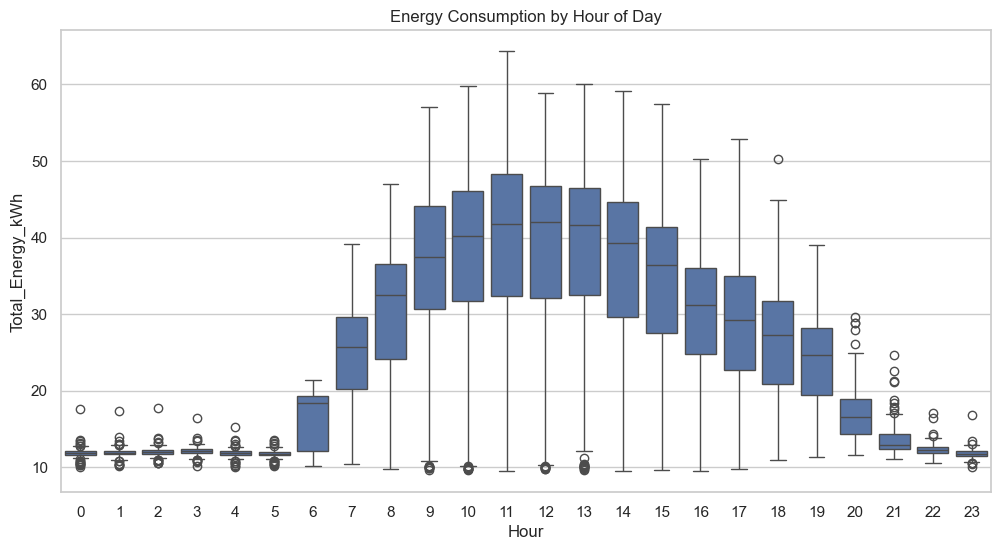

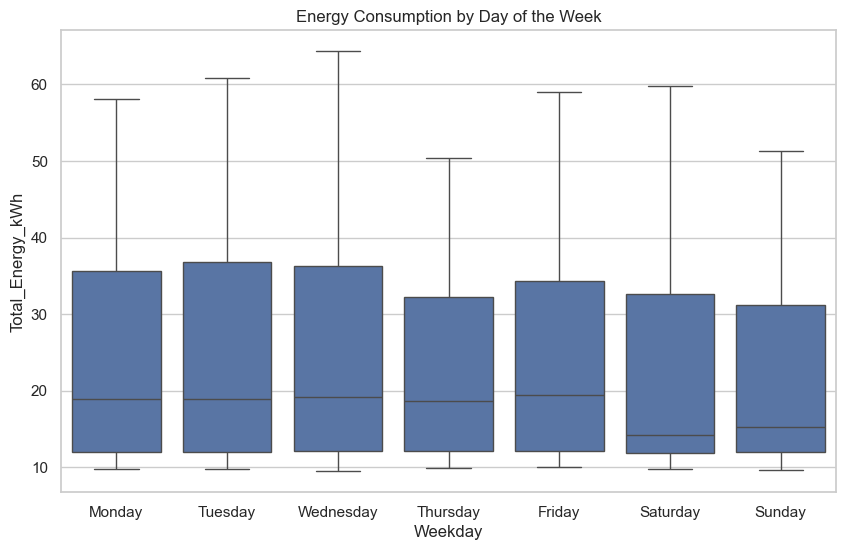

In [113]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Hour', y='Total_Energy_kWh', data=df)
plt.title('Energy Consumption by Hour of Day')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Weekday', y='Total_Energy_kWh', data=df,
            order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Energy Consumption by Day of the Week')
plt.show()

In [114]:
pip install pandoc


In [115]:
pip install pandoc
